# Loyalty Program Analysis

The task assigned is to "Analyse the store's loyalty program". The dataset contains data on purchases made at the building-material retailer Home World. All of its customers have membership cards. Moreover, they can become members of the store's loyalty program for $20 per month. The program includes discounts, information on special offers, and gifts. 

## Content <a id='content'></a>

[Decomposition](#decomposition)

[Datasets](#datasets)

[Data preprocessing](#prep)

[Data Analysis](#eda)

[Hypotheses testing](#sda)

[Dashboard](#dashboard)

[Conclusions](#conclusions)

## Decomposition <a id='decomposition'></a>


### Before we start

Before we can move at all, we need to better define the scope and the goal of the project. To this end, we want to get answers to the questions below, which include both business understandig and initial technical questions, the list of questions is kept plain, even if some questions might seem to be sub-issues of other questions. We will perform a short research to figure out the answers.

#### Understanding the business

1. Who will be the users of the analysis results?
2. How the users are planning to act on the results? e.g. update the program to be more efficient, propose specific actions to sub-groups of customers?
3. Why this is important? Which dicisions do they plan to make based on the results?
4. What are the business metrics which relate most to the task? How do I calculate these metrics correctly?
5. How do we define a "loyal" customer? What metrics do we use for that, how are they calculated and what are the target values?
6. Are we interested in the dynamics or just a snapshot?
7. What factors should be accounted for? Something industry-specfic? Seasonality?

#### Adding technical details

1. How the expected deliverable should look like?
2. What is expected granularity of the analysis? By cities, by company offices, by gender, ages, etc
3. Are there any known issues with the data?

#### Research

According to [shopify.com](https://www.shopify.com/blog/loyalty-program), loyalty programs is one of the most effective tactics for increasing revenue, which is based on the assumption that investing in building trust between customer and business and inspiring customers to buy repeatedly from the brand (and not from the competitors) is more efficient than investing in acquiring new customers, i.e. it costs less to sell to repeat customers than acquire new ones.

How loyalty programs work? Companies offer some benefits to customers, like discounts, free products, rewards, or insider perks, and in return customers buy more from the brand by redeeming those benefits. The most popular types of classical loyalty programs are: point-based (customers first accumulate points and then redeem them), tiered loyalty (when cutomers are ranked by their engagement with the business and become eligible to corresponding offers), value loyalty (generates social benefit, rather than rewards customers; most often involves donations to charities and is supposed to be aligned with customers' values), and paid loyalty (give customers immediate and ongoing benefits for a participation fee, one-time or reccurent). The latter is exactly the type we are dealing with in the task!

Loyalty programs do not always work, sometimes they even [destroy value](https://www.mckinsey.com/business-functions/growth-marketing-and-sales/our-insights/loyalty-is-it-really-working-for-you). Thus, it is important to measure their performance. On the other hand, in order a loyalty program to be a success, beyond a clear goal, it should be built around a core group of value customers (which should be defined beforehand). Thus, the measurement should be fully aligned with [measurement of the customer value](https://media.bain.com/customer-value/home/) and give clues to understanding both the profit and the way the program-members generate it, as well as for how long. The metrics which can support the required investigation are:
1. The share of participants in the program.
2. Frequency of purchase.
3. Difference in average customer spending for program-members and non-members.
4. The share of annual sales / revenue / net profit generated by program participants.
5. Customer lifetime value (CLV/LTV, net profit that you’ll take in over the course of your entire relationship with a customer).

Additional reading: [HBR, Are You Undervaluing Your Customers?](https://hbr.org/2020/01/are-you-undervaluing-your-customers)

#### Answers

Based on the research above and introductory discussion of the dataset with the team leader, we will employ the following conclusions on the business context:

1. Who will be the users of the analysis results? *Marketing Department; they want to understand what works and does not work in the loyalty program.*
2. How the users are planning to act on the results? *Introduce changes in the program to raise its efficiency.*
3. Why this is important? *The loyalty is the key customer value driver and has immediate impact on the bottom line.*
4. What are the business metrics which relate most to the task? *See above, we will drill down into calculations later.*
5. How do we define a "loyal" customer? *We are dealing with a paid loyalty program, thus a loyal customer is the one who paid for joining the program.*
6. Are we interested in the dynamics or just a snapshot? *Dynamics, namely cohort and CLV analysis.*
7. What factors should be accounted for? *We are working for a building-material retailer, basic understanding of the industry can benefit the analysis.*

With regard to the technical details, we have learned the following:
1. The deliverable should be a presentation; preparing a dashboard is desirable.
2. Most probably, we will employ cohort analysis and take a look at the differences between different shops.
3. There can be zero values and negative values in prices and quantities (see the Data overview below).

### Clarifying the task statement

The research above clarifies the task, which now can be formulated as follows: Investigate how much effective is the loyalty program in expanding the total customer value of existing Home World customers and find ways to boost its effectiveness. Thus, we need to:

- Look into basic metrics, like the share of participants, frequency of purchase, average cheque, the share of total sales (given we were not provided with data on cost of goods or profit margin);
- Investigate when customers become members of the loyalty program and if that impacts the frequency and the size of the purchases;
- Estimate customer lifetime value for members and non-members.

For the analysis we will need to find and apply:

- The date of the first purchse;
- The date of joining the loyalty program;
- Number of buyers by cohort lifetime for members and non-members;
- Number of purchases per customer by cohort lifetime for members and non-members;
- Average purchase size by cohort lifetime for members and non-members;
- Initial cohort sizes and total revenue by cohort for members and non-members (to calculate the LTV);

Most probably, we would like to check and test several hypothesis, like:

- Customers start purchasing more frequently after joining the program;
- The average cheque is higher for program members;
- The retention rate is higher for the program members;
- There is difference in the LTV for the two group;
- There are stores for which the loyalty program works better than for the rest of the Home World network.

### Let's plan the whole thing

In what follows, I present my estimate of the workflow and the time required to accomplish the tasks.

- Dataset description (0.5h)

- Data preprocessing (3h)
    - Libraries
    - Files upload and data column names and types check
    - Study missing values
    - Study duplicate values

- EDA
    - Period under investigation (30 min)
    - Number and share of members and non-members of the loyalty program (30 min)
    - Distribution of cheque sizes for the two groups (1 h)
    - Total sales to both groups (1 h)
    - Cohort analysis (6 h)
        - The date of the first purchase;
        - The date of joining the loyalty program;
        - Number of buyers by cohort lifetime for members and non-members;
        - Number of purchases per customer by cohort lifetime for members and non-members;
        - Average purchase size by cohort lifetime for members and non-members;
        - Initial cohort sizes and total revenue by cohort for members and non-members (to calculate the LTV);

- Hypothesis testing (6 h)
    - Choose the hypothesis for testing;
    - Explain the set up and the test to be employed;
    - Formulate the null and the alternative hypothesis;
    - Implement testing;
    - Elaborate on the results.

- Dashboard construction (6 h)

- Conclusions and recommendation (3 h)

Let's start!

[Back to Content](#content)

## Dataset description <a id='datasets'></a>

The main dataset at our disposal, `retail_dataset_us.csv`, contains data on purchases made at the building-material retailer Home World:


- `purchaseId`
- `item_ID`
- `purchasedate`
- `Quantity` — the number of items in the purchase
- `CustomerID`
- `ShopID`
- `loyalty_program` — whether the customer is a member of the loyalty program

There is additional file, `product_codes_us.csv`, which contains:

- `productID`
- `price_per_one`

This wile will be used to calculate the purchase size.

[Back to Content](#content)

## Data preprocessing <a id='prep'></a>


### Libraries

Let's import the necessary libraries. If additional libraries are needed, we will add them here as well.

In [1]:
# Loading basic libraries

import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt # We will need this for visualisations
%matplotlib inline
import seaborn as sns
# Standard plotly imports
import plotly.graph_objs as go
import plotly.express as px
import plotly.subplots as subplots
from plotly.subplots import make_subplots
from plotly import tools


from scipy import stats # We will need this in case we want to make some statistical checks
import math as mth

# To filter out automatic comments on plots from Jupyter (not affecting the output)
import warnings
warnings.filterwarnings("ignore") 

[Back to Content](#content)

### Files upload and data column names and types check

#### Purchases

We will use a `load()` function to avoid potential problems with the file pathes.

In [2]:
# function `load` for a csv load with try-except and a number of rows limit
def load(filename, nrows):
    """
    i=In addition to the file name, the function takes nrow parameter
    for a particular number of rows to load. If None, then the file is loaded fully.
    """
    try:
        df_raw = pd.read_csv(filename, nrows=nrows)
    except:
        df_raw = pd.read_csv('/'+filename, nrows=nrows)
    return df_raw

In [3]:
# Load the first 500 rows of the visits file into a DataFrame
purchases_500 = load('datasets/retail_dataset_us.csv', 500)

In [4]:
purchases_500.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   purchaseid       500 non-null    object 
 1   item_ID          500 non-null    object 
 2   Quantity         500 non-null    int64  
 3   purchasedate     500 non-null    object 
 4   CustomerID       328 non-null    float64
 5   loyalty_program  500 non-null    int64  
 6   ShopID           500 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 141.0 KB


In [5]:
purchases_500.head()

purchaseid item_ID  Quantity         purchasedate  CustomerID  \
0     538280   21873        11  2016-12-10 12:50:00     18427.0   
1     538862   22195         0  2016-12-14 14:11:00     22389.0   
2     538855   21239         7  2016-12-14 13:50:00     22182.0   
3     543543   22271         0  2017-02-09 15:33:00     23522.0   
4     543812   79321         0  2017-02-13 14:40:00     23151.0   

   loyalty_program   ShopID  
0                0   Shop 3  
1                1   Shop 2  
2                1   Shop 3  
3                1  Shop 28  
4                1  Shop 28

The first 500 rows take 141 KB of the memory, let's fix the data type in advance, when possible.

The column `purchasedate` contains the date and time, let's cast it to date with the `to_datetime()` method.

In [6]:
purchases_500['purchasedate'] =  pd.to_datetime(purchases_500['purchasedate'], format="%Y-%m-%d %H:%M:%S")
purchases_500.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchaseid       500 non-null    object        
 1   item_ID          500 non-null    object        
 2   Quantity         500 non-null    int64         
 3   purchasedate     500 non-null    datetime64[ns]
 4   CustomerID       328 non-null    float64       
 5   loyalty_program  500 non-null    int64         
 6   ShopID           500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 107.8 KB


The column `CustomerID` is of `float` type, since it contains missing values (~36%), let's think what we can do with those entries that do not contain `CustomerID` - all in all, we cannot analyse customer behaviour without being able to identify them. Let's check whether we have any chance to restore the `CustomerID` using `purchaseid`:

In [7]:
# extract purchase ID`s for the purchases with missing customer ID`s
custid_isna_unique_purchid = purchases_500.sort_values(
                    by = 'purchaseid')[purchases_500['CustomerID'].isna()]['purchaseid'].unique()
custid_isna_unique_purchid = list(custid_isna_unique_purchid)

In [8]:
# check whether those purchase ID`s appear in the entries with non-missing customer ID's
purchases_500[(purchases_500['purchaseid'].isin(custid_isna_unique_purchid) & (purchases_500['CustomerID'] > 0))]

Empty DataFrame
Columns: [purchaseid, item_ID, Quantity, purchasedate, CustomerID, loyalty_program, ShopID]
Index: []

Looks, like none of the purchase ID's with missing `CustomerID` has entries with non-missing `CustomerID`; let's check how the purchases with missing and non-missing customer ID's are related to the `loyalty_program` variable:

In [9]:
purchases_500['loyalty_program'].value_counts()

0    376
1    124
Name: loyalty_program, dtype: int64

In [10]:
purchases_500[purchases_500['loyalty_program']==0]['CustomerID'].isna().count()

376

Hm... Looks, like we have a full set of customer ID's only for the loyalty program participants; while we will have to dig deeper to find the situation with regard to the non-members.

Lets' redefine the `load()` function:

In [11]:
# function `load` for a csv load with try-except, row number limit and dtype and parse_dates definitions.
def load(filename, nrows = None, dtype = None, parse_dates=None):
    """
    We add `dtype` and `parse_dates` parameters to pass to the `read_csv()` function.
    The function prints out `df.info()` and returns the dataset as pandas DataFrame.
    """
    try:
        df_raw = pd.read_csv(filename, nrows=nrows, dtype=dtype, parse_dates = parse_dates)
    except:
        df_raw = pd.read_csv('/'+filename, nrows=nrows, dtype=dtype, parse_dates = parse_dates)
    print(df_raw.info(memory_usage='deep'))
    return df_raw

In [12]:
# Load the 500 rows of purchases again
purchases_500 = load(
            'datasets/retail_dataset_us.csv', 500,
            dtype={'ShopID': 'category'},
            parse_dates=['purchasedate']
            
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchaseid       500 non-null    object        
 1   item_ID          500 non-null    object        
 2   Quantity         500 non-null    int64         
 3   purchasedate     500 non-null    datetime64[ns]
 4   CustomerID       328 non-null    float64       
 5   loyalty_program  500 non-null    int64         
 6   ShopID           500 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 80.3 KB
None


80 KB instead 141!

OK, now we can read the source file as a whole and save some memory (we will not try to cast the purchase ID's and the item ID's, since they have not been loaded as integers, which means some of them contain letters).

In [13]:
# Load the full ourchses file into a DataFrame
purchases = load(
            'datasets/retail_dataset_us.csv',
            dtype={'ShopID': 'category'},
            parse_dates=['purchasedate'],
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       105335 non-null  object        
 1   item_ID          105335 non-null  object        
 2   Quantity         105335 non-null  int64         
 3   purchasedate     105335 non-null  datetime64[ns]
 4   CustomerID       69125 non-null   float64       
 5   loyalty_program  105335 non-null  int64         
 6   ShopID           105335 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 15.9 MB
None


Let's fix the column names as well:

In [14]:
names = ['purchase_id', 'item_id',
                     'item_ qty', 'purchase_date',
                     'customer_id', 'loyalty_program',
                     'shop_id']

In [15]:
purchases.columns = names

In [16]:
purchases.head()

purchase_id item_id  item_ qty       purchase_date  customer_id  \
0      538280   21873         11 2016-12-10 12:50:00      18427.0   
1      538862   22195          0 2016-12-14 14:11:00      22389.0   
2      538855   21239          7 2016-12-14 13:50:00      22182.0   
3      543543   22271          0 2017-02-09 15:33:00      23522.0   
4      543812   79321          0 2017-02-13 14:40:00      23151.0   

   loyalty_program  shop_id  
0                0   Shop 3  
1                1   Shop 2  
2                1   Shop 3  
3                1  Shop 28  
4                1  Shop 28

Last thing here, lets' count the purchases:

In [17]:
purchases['purchase_id'].nunique()

4894

We have data on 4894 purchases, which included 105335 `items_id`'s, 21.5 products per purchase on average (sounds a bit high).

#### Prices

Let's read the second file, `product_codes_us.csv`.

In [18]:
# Load the full ourchses file into a DataFrame
prices = load(
            'datasets/product_codes_us.csv'
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   productID;price_per_one  3159 non-null   object
dtypes: object(1)
memory usage: 207.3 KB
None


OK, here we have a separator issue, let's add the `sep` parameter to our `load()` function:

In [19]:
# function `load` for a csv load with try-except, row number limit and dtype and parse_dates definitions.
def load(filename, sep = None, nrows = None, dtype = None, parse_dates=None):
    """
    We add `sep`, `dtype` and `parse_dates` parameters to pass to the `read_csv()` function.
    The function prints out `df.info()` and returns the dataset as pandas DataFrame.
    """
    try:
        df_raw = pd.read_csv(filename, nrows=nrows, dtype=dtype, parse_dates = parse_dates, sep = sep)
    except:
        df_raw = pd.read_csv('/'+filename, nrows=nrows, dtype=dtype, parse_dates = parse_dates, sep = sep)
    print(df_raw.info(memory_usage='deep'))
    return df_raw

In [20]:
# Load the full ourchses file into a DataFrame
prices = load(
            'datasets/product_codes_us.csv', sep = ';'
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 217.0 KB
None


For this file, we have to update the column names as well:

In [21]:
prices.columns = ['item_id', 'item_unit_price']

In [22]:
prices.head()

item_id  item_unit_price
0   10002             0.85
1   10080             0.85
2   10120             0.21
3  10123C             0.65
4  10124A             0.42

[Back to Content](#content)

### Study missing values

#### Purchases

OK, now we have the initial data on purchases uploaded, so let's just check our initial conclusion on the missing customer ID's:

In [23]:
purchases['loyalty_program'].value_counts()

0    81493
1    23842
Name: loyalty_program, dtype: int64

In [24]:
purchases[purchases['loyalty_program']==0]['customer_id'].isna().sum()

36210

So, out of 81493 entries in the `purchases` dataset for loyalty program non-members, 36147 have `customer_id` missing.

Let's check whether we have any chance to restore them using `purchase_id`:

In [25]:
# extract purchase ID`s for the purchases with missing customer ID`s
custid_unique_purchid = purchases[purchases['customer_id']>0]['purchase_id'].unique()
custid_unique_purchid = list(custid_isna_unique_purchid)

# check whether those purchase ID`s appear in the entries with non-missing customer ID's
purchases[(purchases['purchase_id'].isin(custid_unique_purchid)) & (purchases['customer_id'].isna())]

purchase_id item_id  item_ qty       purchase_date  customer_id  \
6           540468   22189          0 2017-01-07 13:55:00          NaN   
7           541424   79321          1 2017-01-17 17:57:00          NaN   
8           538883   22891          0 2016-12-14 15:56:00          NaN   
11          541696   22197          4 2017-01-20 18:08:00          NaN   
16          539744   22300          5 2016-12-21 15:21:00          NaN   
...            ...     ...        ...                 ...          ...   
105324      545216   21257          1 2017-02-28 16:50:00          NaN   
105326      540681   22227          1 2017-01-10 16:25:00          NaN   
105327      538349   22625          0 2016-12-10 14:59:00          NaN   
105329      540154   22134          3 2017-01-05 11:30:00          NaN   
105330      538566   21826          1 2016-12-13 11:21:00          NaN   

        loyalty_program shop_id  
6                     0  Shop 0  
7                     0  Shop 0  
8                     0  Shop 0  
11                    0  Shop 0  
16                    0  Shop 0  
...                 ...     ...  
105324                0  Shop 0  
105326                0  Shop 0  
105327                0  Shop 0  
105329                0  Shop 0  
105330                0  Shop 0  

[24713 rows x 7 columns]

No `purchase_id` for which the `customer_id` is missing appears in the subset which does contain `custome_id`'s, i.e. for none of entries with missing `customer_id` it can be restored. On the other hand, knowing that the two subsets of data on non-members, the one which does contain data on `customer_id` and the one which does not, contain data on different purchases, in what follows, we can drop the latter one, since it does not allow the further analysis at the user level. N.B. Given the high amount of `item_id'`s per purchase for the initial dataset, it might be the case, that purchases with missing `customer_id` are those performed from business accounts, which are identified is some other way, like `business_id`, let's check how many purchases out of the total of 4894 do have `customer_id`.

In [26]:
purchases[~purchases['customer_id'].isna()]['purchase_id'].nunique()

4146

Thus, we have 4146 purchases, performed by customers, which can be identified by a `customer_id`. Let's clean the `purchases` dataframe and check some stats:

In [27]:
purchases = purchases[~purchases['customer_id'].isna()]

In [28]:
len(purchases)

69125

In [29]:
purchases['customer_id'] = purchases['customer_id'].astype('int')

OK, now we have data on 4146 purchases, which included 69125 `items_id`'s, 16.7 products per purchase on average (sounds more reasonable for private customers).

#### Prices

With regard to the prices, let's check that we have prices for all items in the `purchases` dataframe:

In [30]:
priced_items = list(prices['item_id'].unique())

In [31]:
purchases['tag'] = np.where(purchases['item_id'].isin(priced_items), 'price_exists', 'no_price_found')

In [32]:
purchases['tag'].value_counts()

price_exists    69125
Name: tag, dtype: int64

OK. We have prices for all items in the `purchases` dataset.

[Back to Content](#content)

### Study duplicate values

First, we check the `purchases` dataset:

In [33]:
purchases.duplicated().sum()

971

We have 971 full duplicates for the resulting `purchases` dataframe; they sound unreasonable, since they include the exact timestamp and the shop; let's drop them:

In [34]:
purchases = purchases.drop_duplicates()

Let's make additional check, on the first three columns:

In [35]:
purchases.duplicated(['purchase_id', 'item_id', 'item_ qty']).sum()

0

We have no entries with the same `purchase_id`, `item_id`, `item_ qty`.

Now we can check the `prices` dataframe for duplicates:

In [36]:
prices.duplicated().sum()

0

Zero duplicates, let's check that each item has unique price:

In [37]:
price_count = prices.pivot_table(index = 'item_id', values = 'item_unit_price', aggfunc = 'count')

In [38]:
price_count[price_count['item_unit_price']!= 1]

Empty DataFrame
Columns: [item_unit_price]
Index: []

OK, all units have unique price.

[Back to Content](#content)

### Data preprocessing summary

1. The initial set of purchase data contained information on 4894 purchases, which included 105335 `items_id`'s, 21.5 products per purchase on average.
2. `customer_id` was missing for 748 `purchase_id`'s of the loyalty program non-member subset; no `purchase_id` for which the `customer_id` was missing appeared in the subset which contained `custome_id`'s, i.e. the two subsets of data on non-members, the one with data on `customer_id` and the one without it, contained data on different purchases; given the high amount of `item_id'`s per purchase for the initial dataset, we concluded that it might be the case, that purchases with missing `customer_id` are those performed from business accounts, which are identified is some other way, like `business_id`.
3. Thus, we were left with 4146 purchases, performed by customers, which could be identified with a `customer_id`; those 4146 purchases included 69125 `items_id`'s, 16.7 products per purchase on average.
4. We have found and dropped 971 full duplicates for the resulting `purchases` dataframe (they sound unreasonable, since they include the exact timestamp and the shop).
5. With regard to the prices, we checked that we have prices for all items in the `purchases` dataset.

N.B. We saw and fixed some minor issues with column names and separator, while loading the source files.

[Back to Content](#content)

## EDA <a id='eda'></a>

### Period under investigation

In [39]:
purchases['purchase_date'].min(), purchases['purchase_date'].max()

(Timestamp('2016-12-01 08:26:00'), Timestamp('2017-02-28 17:01:00'))

The `purchases` dataset covers a period of three months between Dec 01, 2016 and Feb 28, 2017. Let's check whether all the dates are coverd (winter holidays are supposed to impact the open hours):

In [40]:
purchases.columns

Index(['purchase_id', 'item_id', 'item_ qty', 'purchase_date', 'customer_id',
       'loyalty_program', 'shop_id', 'tag'],
      dtype='object')

In [41]:
fig = px.histogram(purchases, x="purchase_date", color="loyalty_program")
fig.update_layout(title_text="Distribution of item purchases by dates for members and non-memebrs of the loyalty program")
fig.update_xaxes(title_text='date')
fig.update_layout(legend_title_text='Loyalty program')
fig.show()

There is a gap in the data between Dec 24, 2016 and Jan 3, 2017.

[Back to Content](#content)

###  Number and share of members and non-members of the loyalty program

Now, we can count the members and non-members.

In [42]:
pd.DataFrame(purchases['loyalty_program'].value_counts()).join(
    pd.DataFrame(purchases['loyalty_program'].value_counts(normalize = True)), lsuffix = '_number', rsuffix = '_share')

loyalty_program_number  loyalty_program_share
0                   44742               0.656484
1                   23412               0.343516

About 34.4% of the dataset are items bought by the loyalty program members; we can check how many customers are there in each group and how many purchases they performed:

In [43]:
purchases[purchases['loyalty_program']==1]['customer_id'].nunique()

587

In [44]:
purchases[purchases['loyalty_program']==1]['purchase_id'].nunique()

1344

All the purchases through the loyalty program were performed by 587 customers who made 1344 purchases out of 4146 purchases in total in the dataset.

Let's check that part of the initial `purchases` dataset, which contains `customer_id`:

In [45]:
purchases[purchases['loyalty_program']==0]['customer_id'].nunique()

1162

In [46]:
purchases[purchases['loyalty_program']==0]['purchase_id'].nunique()

2802

For the subset of non-member purchases, we have data on 1162 customers who made 2802 purchases in total.

Let's check whether there are customers who performed purchases in both statuses:

In [47]:
purchases['customer_id'].nunique()

1749

A bit surprising, but the two groups consist of different customers, meaning that every one was only in one status through out the period under investigation and did not performed transition from one of the groups to the second one. Let's calculate the share of the members and the share of their purchases:

In [48]:
purchases[purchases['loyalty_program']==1]['customer_id'].nunique() / purchases['customer_id'].nunique()

0.33562035448827904

In [49]:
purchases[purchases['loyalty_program']==1]['purchase_id'].nunique() / purchases['purchase_id'].nunique()

0.32416787264833574

Hm... the share of the loyalty program members is appr. 33.6% and they are responsible for 32.4% of the purchases. Let's move to the cheque sizes.

[Back to Content](#content)

### Distribution of cheque sizes for the two groups

First, we will get some sense of the price levels, let's take a look at the statistics and plot a histogram of `prices`.

In [50]:
prices.describe()

item_unit_price
count      3159.000000
mean          2.954495
std           7.213808
min           0.000000
25%           0.650000
50%           1.450000
75%           3.290000
max         175.000000

In [51]:
p99 = prices.quantile(0.99)
p99

item_unit_price    18.2274
Name: 0.99, dtype: float64

The maximum price is 175 money units, sounds reasonable; 99% of items have prices below 18.23 money units, meaning there are 32 items prices higher on the price list; the price of 50% of the items is equal or less 1.45 money units.

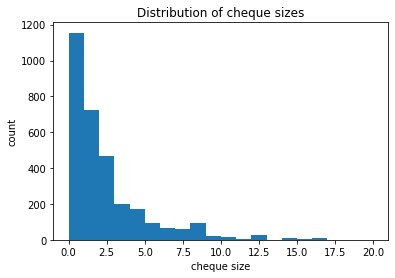

In [52]:
plt.hist(prices['item_unit_price'], range = (0, 20), bins = 20)
plt.xlabel("cheque size")
plt.ylabel("count")
plt.title("Distribution of cheque sizes")
plt.show()

Let's extract a list of the `item_id`'s for the most expencive items: chances are that purchases of these items are very rare and make the most input in the outliers, so we may consider dropping those purchases later on.

In [53]:
lux_items = list(prices.query('item_unit_price > @p99[0]').index)

In [54]:
len(lux_items)

32

OK, let's move to calculating the cheque sizes.

In [55]:
# check column names
purchases.columns

Index(['purchase_id', 'item_id', 'item_ qty', 'purchase_date', 'customer_id',
       'loyalty_program', 'shop_id', 'tag'],
      dtype='object')

In [56]:
cheque_size = purchases[['purchase_id', 'item_id', 'item_ qty']].merge(prices, on = 'item_id', how = 'left')

In [57]:
cheque_size.head()

purchase_id item_id  item_ qty  item_unit_price
0      538280   21873         11             0.42
1      538862   22195          0             1.65
2      538855   21239          7             0.72
3      543543   22271          0             2.55
4      543812   79321          0             0.00

In [58]:
cheque_size['item_id_total'] = cheque_size['item_ qty'] * cheque_size['item_unit_price']

In [59]:
cheque_size = cheque_size.pivot_table(index = 'purchase_id', values = 'item_id_total', aggfunc = 'sum').reset_index()

In [60]:
cheque_size = cheque_size.rename(columns = {'item_id_total': 'cheque_size'})

In [61]:
cheque_size.head()

purchase_id  cheque_size
0      536365        62.80
1      536366         0.00
2      536367       169.93
3      536368        48.45
4      536369        10.90

In [62]:
cheque_size.describe()

cheque_size
count   4146.000000
mean     215.599778
std     1803.617460
min   -77184.640000
25%       14.775000
50%      106.945000
75%      232.582500
max    77182.560000

We see some strange result, very large negative total purchase sizes, very high total purchase sizes, and zeroes... let's investigate this.

In [63]:
cheque_size.query('cheque_size < 0').head(10)

purchase_id  cheque_size
3385     C536379       -11.52
3387     C536391       -95.80
3388     C536506       -26.25
3389     C536543        -2.16
3390     C536548       -91.64
3391     C536606        -7.65
3392     C536622       -22.95
3393     C536625       -38.25
3394     C536642        -5.00
3395     C536734       -30.75

In [64]:
cheque_size.query('cheque_size < 0').nunique()

purchase_id    656
cheque_size    415
dtype: int64

656 `purchase_id`'s out of 4146 have negative cheque size.

In [65]:
cheque_size.query('cheque_size == 0').head(10)

purchase_id  cheque_size
1        536366          0.0
7        536372          0.0
9        536374          0.0
12       536377          0.0
31       536399          0.0
35       536403          0.0
39       536407          0.0
61       536521          0.0
107      536581          0.0
110      536584          0.0

In [66]:
cheque_size.query('cheque_size == 0').nunique()

purchase_id    253
cheque_size      1
dtype: int64

253 `purchase_id`'s out of 4146 have zero cheque size.

In [67]:
cheque_size.query('cheque_size > 0').head(25)

purchase_id  cheque_size
0       536365        62.80
2       536367       169.93
3       536368        48.45
4       536369        10.90
5       536370       644.57
6       536371       201.45
8       536373       156.05
10      536375       156.05
11      536376       160.65
13      536378       332.20
14      536380        28.75
15      536381       236.84
16      536382       285.35
17      536384       241.52
18      536385        74.15
19      536386       163.35
20      536387      2451.04
21      536388       143.43
22      536389       215.27
23      536390      1291.52
24      536392        82.02
25      536393        59.50
26      536394       160.20
27      536395       208.72
28      536396       229.39

In [68]:
cheque_size.query('cheque_size > 0').nunique()

purchase_id    3237
cheque_size    3065
dtype: int64

The numbers of positive, zero and negative cheques sum up to the total number of `purchase_id`'s.

We see that the negative numbers have `purchase_id` with the letter `C` in the beginning, though their numbers, as well as the numbers of zero-zum purchases, are part of the overall series of purchase ID's. 

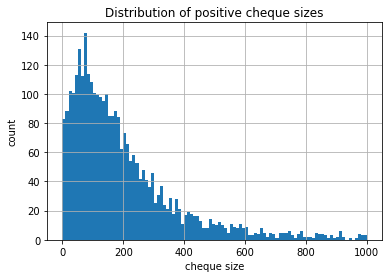

In [69]:
cheque_size.query('cheque_size > 0')['cheque_size'].hist(range = (0,1000), bins = 100)
plt.xlabel("cheque size")
plt.ylabel("count")
plt.title("Distribution of positive cheque sizes")
plt.show()

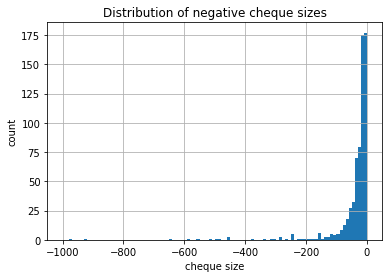

In [70]:
cheque_size.query('cheque_size < 0')['cheque_size'].hist(range = (-1000,0), bins = 100)
plt.xlabel("cheque size")
plt.ylabel("count")
plt.title("Distribution of negative cheque sizes")
plt.show()

Let's consider all the information in the `purchases` dataset and add the price per `item_id`:

In [71]:
purchases = purchases.drop('tag', axis = 1).merge(prices, on = 'item_id', how = 'left')

In [72]:
purchases['item_id_total'] = purchases['item_ qty'] * purchases['item_unit_price']

In [73]:
purchases.head()

purchase_id item_id  item_ qty       purchase_date  customer_id  \
0      538280   21873         11 2016-12-10 12:50:00        18427   
1      538862   22195          0 2016-12-14 14:11:00        22389   
2      538855   21239          7 2016-12-14 13:50:00        22182   
3      543543   22271          0 2017-02-09 15:33:00        23522   
4      543812   79321          0 2017-02-13 14:40:00        23151   

   loyalty_program  shop_id  item_unit_price  item_id_total  
0                0   Shop 3             0.42           4.62  
1                1   Shop 2             1.65           0.00  
2                1   Shop 3             0.72           5.04  
3                1  Shop 28             2.55           0.00  
4                1  Shop 28             0.00           0.00

Let's check, whether there are cpecific shops with negative totals:

In [74]:
len(purchases['shop_id'].unique())

31

In [75]:
shops_count = purchases.query('item_id_total < 0').pivot_table(
        index = 'shop_id', values = 'item_id_total', aggfunc = 'count').reset_index().sort_values(by = 'item_id_total')

In [76]:
shops_count.shape

(31, 2)

No, each shop has cases of negative cheques.

Let's check whether there are purchase both with positive and negative `item_id_total` values:

In [77]:
purchases.query('item_id_total > 0')['purchase_id'].nunique()

3237

In [78]:
purchases.query('item_id_total < 0')['purchase_id'].nunique()

656

In [79]:
purchases.query('item_id_total == 0')['purchase_id'].nunique()

3101

The numbers of `purchase_id`'s with only negative and only positive `item_id_total`'s coincide with the numbers negative and positive cheques corrispondingly; we have also derived that there are in total 253 zero cheques; thus, there are also 2848 `purchase_id`' s that contain zero `item_id_total`'s, but result in either positive or negative cheques. Let's check whether in the list of `purchase_id`'s with zero `item_id_total`'s there are those with the letter `C` in them:

In [80]:
len([x for x in list(purchases.query('item_id_total == 0')['purchase_id'].unique()) if 'C' in x])

277

OK, we can coclude that both negative and positive cheques can contain zero `item_id_total`'s.

Let's check how concise list of `item_id`'s with zero prices compared to `item_id`'s resulted in zero `item_id_total`:

In [81]:
purchases.query('item_unit_price == 0')['item_id'].nunique()

310

In [82]:
purchases.query('(item_unit_price != 0) & (item_id_total == 0)')['item_id'].nunique()

1849

310 items on the price list have zero prices and 1849 items have non-zero price and entered some purchases with zero quantities...

Let's check whether there are specific items which entered the dataset only with negative quantities:

In [83]:
negative_items = [x for x in list(purchases.query('item_id_total < 0')['item_id'].unique())
                 if x not in list(purchases.query('item_id_total >= 0')['item_id'].unique())]

In [84]:
len(negative_items)

17

In [85]:
purchases.query('item_id in @negative_items')

purchase_id item_id  item_ qty       purchase_date  customer_id  \
2156      C536548   20957         -2 2016-12-01 14:33:00        18151   
8846      C542346   22596         -2 2017-01-27 12:00:00        18388   
9198      C540393   85042         -2 2017-01-06 18:08:00        23107   
10179     C540535  85023C         -2 2017-01-09 14:17:00        20684   
11384     C537164       D         -2 2016-12-05 13:21:00        20206   
11742     C540171       D         -2 2017-01-05 12:26:00        20206   
21415     C536379       D         -2 2016-12-01 09:41:00        20206   
24387     C539003       D         -2 2016-12-15 12:35:00        20206   
26405     C538897       D         -2 2016-12-15 09:14:00        22101   
28156     C543789       D         -2 2017-02-11 17:10:00        23129   
30232     C540246   85042         -3 2017-01-05 15:43:00        18760   
33653     C543752       D         -2 2017-02-11 14:12:00        19710   
36226     C537763   85068         -2 2016-12-08 12:03:00        22392   
38144     C537788  16202E         -2 2016-12-08 12:49:00        21595   
40748     C541589  79323W         -9 2017-01-19 14:44:00        21510   
44304     C540164   21412         -7 2017-01-05 12:02:00        20590   
44397     C537597       D         -2 2016-12-07 12:34:00        21177   
46764     C543758       D         -2 2017-02-11 15:07:00        20978   
49346     C538100  84798A        -13 2016-12-09 15:00:00        22258   
53368     C538726   35832         -2 2016-12-14 11:18:00        18757   
53419     C537814   20703         -4 2016-12-08 13:43:00        18391   
54425     C542866   85063         -3 2017-02-01 12:14:00        20990   
54846     C538898   37503         -2 2016-12-15 09:20:00        20757   
60303     C543840       D         -2 2017-02-14 11:19:00        20206   
62934     C544653   85065         -2 2017-02-22 12:55:00        18792   
65597     C537857       D         -2 2016-12-08 16:00:00        23019   
65601     C539589       D         -2 2016-12-20 13:14:00        20206   
68059     C540246   79320         -2 2017-01-05 15:43:00        18760   
68136     C540164   21144        -13 2017-01-05 12:02:00        20590   

       loyalty_program  shop_id  item_unit_price  item_id_total  
2156                 0   Shop 0             1.45          -2.90  
8846                 0   Shop 7             0.72          -1.44  
9198                 1   Shop 8             4.95          -9.90  
10179                0  Shop 17             2.55          -5.10  
11384                0   Shop 5             5.76         -11.52  
11742                0   Shop 4             5.76         -11.52  
21415                0  Shop 15             5.76         -11.52  
24387                0   Shop 5             5.76         -11.52  
26405                1  Shop 23             5.76         -11.52  
28156                1   Shop 4             5.76         -11.52  
30232                0  Shop 19             4.95         -14.85  
33653                0   Shop 5             5.76         -11.52  
36226                1  Shop 27             7.95         -15.90  
38144                0  Shop 12             5.55         -11.10  
40748                0   Shop 9             6.75         -60.75  
44304                0  Shop 16             0.42          -2.94  
44397                0   Shop 0             5.76         -11.52  
46764                0  Shop 12             5.76         -11.52  
49346                1  Shop 14             2.55         -33.15  
53368                0  Shop 22             2.95          -5.90  
53419                0   Shop 7             4.25         -17.00  
54425                0  Shop 26            14.95         -44.85  
54846                0  Shop 24            10.75         -21.50  
60303                0  Shop 30             5.76         -11.52  
62934                0   Shop 3            12.75         -25.50  
65597                1   Shop 5             5.76         -11.52  
65601                0  Shop 22  

There are 17 `item_id`'s which entered the dataset only with negative quantities and only in "C-purchases".

OK, up until now we learned that items can be sold at zero price or enter purchases with zero quantities, positive cheques contain only positive or zero `item_id_total`'s, negative cheques contain only negative or zero `item_id_total`'s, all shops have cases of negative cheques. One of the possible hypotheses could be that C stands for returns; however, it would mean that customers would return items before purchasing them and to the shops different from those they made a "positive purchase". Let's illustrate:

In [86]:
# we will consider the non-members separately
purchases_0 = purchases[purchases['loyalty_program']==0]

In [87]:
# and members separately
purchases_1 = purchases[purchases['loyalty_program']==1]

In [88]:
# list several customer_id of non-members with C-purchases
purchases_0.query('item_id_total < 0').head(10)

purchase_id item_id  item_ qty       purchase_date  customer_id  \
46       C539944   22776         -2 2016-12-23 11:38:00        20239   
79       C542426   22418        -25 2017-01-28 09:32:00        19825   
223      C544034   21878         -2 2017-02-15 11:28:00        20380   
304      C539667   21285        -25 2016-12-21 10:47:00        18827   
516      C539644   21577         -2 2016-12-20 15:52:00        18150   
951      C540307   22107         -9 2017-01-06 12:58:00        21502   
1083     C538833   21558         -2 2016-12-14 13:05:00        20359   
1103     C538059   48188         -3 2016-12-09 13:38:00        19884   
1166     C540177   22781         -5 2017-01-05 12:42:00        21995   
1237     C543755   21915        -13 2017-02-11 14:48:00        19983   

      loyalty_program  shop_id  item_unit_price  item_id_total  
46                  0  Shop 27             8.50         -17.00  
79                  0  Shop 27             0.85         -21.25  
223                 0   Shop 9             0.72          -1.44  
304                 0   Shop 4             0.65         -16.25  
516                 0  Shop 23             2.25          -4.50  
951                 0  Shop 28             3.75         -33.75  
1083                0   Shop 4             2.10          -4.20  
1103                0  Shop 15             6.75         -20.25  
1166                0   Shop 7             6.75         -33.75  
1237                0  Shop 11             1.06         -13.78

In [89]:
# list several customer_id of members with C-purchases
purchases_1.query('item_id_total < 0').head(10)

purchase_id item_id  item_ qty       purchase_date  customer_id  \
160      C539726   22791        -11 2016-12-21 14:24:00        22686   
410      C543764  79191D        -13 2017-02-11 15:16:00        22714   
1031     C537602   22654         -2 2016-12-07 12:45:00        23190   
1081     C538062   22329         -5 2016-12-09 13:40:00        23381   
1153     C541852   21781         -2 2017-01-23 14:21:00        23520   
1224     C543841       M         -2 2017-02-14 11:20:00        22774   
1341     C544780   37370         -6 2017-02-23 12:05:00        22380   
1350     C537602   22197         -2 2016-12-07 12:45:00        23190   
1670     C539569   85048         -7 2016-12-20 12:01:00        22883   
1890     C536812   22574       -193 2016-12-02 16:58:00        22225   

      loyalty_program  shop_id  item_unit_price  item_id_total  
160                 1   Shop 3             1.06         -11.66  
410                 1  Shop 18             0.85         -11.05  
1031                1  Shop 15             4.95          -9.90  
1081                1  Shop 26             1.45          -7.25  
1153                1  Shop 14            12.75         -25.50  
1224                1  Shop 21             0.19          -0.38  
1341                1   Shop 5             1.06          -6.36  
1350                1  Shop 15             0.72          -1.44  
1670                1   Shop 8             6.95         -48.65  
1890                1  Shop 23             0.72        -138.96

In [90]:
#purchases_1.query('item_id_total >= 0').sort_values(by = ['customer_id', 'purchase_id']).head(20)

Now, let's check a couple of `customer_id`'s from these two lists:

In [91]:
# customer 18827 "returned" items he didn't bought before and to shops 4 and 6, desite him shopping in shop 29...
purchases_0[purchases_0['customer_id']==18827].sort_values(by = 'purchase_date').head(30)

purchase_id item_id  item_ qty       purchase_date  customer_id  \
36059      538296  84970S         11 2016-12-10 13:06:00        18827   
8601       538296  85114A          5 2016-12-10 13:06:00        18827   
19316      538296   22768          1 2016-12-10 13:06:00        18827   
26648      538296  85123A          5 2016-12-10 13:06:00        18827   
66882      538296   22178         11 2016-12-10 13:06:00        18827   
4630       538296   84631          1 2016-12-10 13:06:00        18827   
39235      538296   22111         11 2016-12-10 13:06:00        18827   
41151      538296   22470          5 2016-12-10 13:06:00        18827   
41541      538296   84799         47 2016-12-10 13:06:00        18827   
3725       538296   22822          1 2016-12-10 13:06:00        18827   
45417      538296   22212          5 2016-12-10 13:06:00        18827   
2889       538296   21422         15 2016-12-10 13:06:00        18827   
56305      538296   21421         11 2016-12-10 13:06:00        18827   
63594      538296   84879          7 2016-12-10 13:06:00        18827   
858        538296   20725          9 2016-12-10 13:06:00        18827   
526        538296   22779          3 2016-12-10 13:06:00        18827   
44206      538296   21136          7 2016-12-10 13:06:00        18827   
8475       538296  85114B          5 2016-12-10 13:06:00        18827   
8598      C539667   21658         -2 2016-12-21 10:47:00        18827   
48176     C539667  85131A         -7 2016-12-21 10:47:00        18827   
37272     C539667   21284        -25 2016-12-21 10:47:00        18827   
66645     C539667   21533         -2 2016-12-21 10:47:00        18827   
304       C539667   21285        -25 2016-12-21 10:47:00        18827   
4846      C539667   22784         -2 2016-12-21 10:47:00        18827   
40332     C542604   21262         -3 2017-01-30 12:35:00        18827   
31948     C542604   21352         -4 2017-01-30 12:35:00        18827   
46393     C542604   22768         -2 2017-01-30 12:35:00        18827   
47447     C542604   21351         -6 2017-01-30 12:35:00        18827   
49089     C542604   22625         -2 2017-01-30 12:35:00        18827   
5065      C542604   22666         -2 2017-01-30 12:35:00        18827   

       loyalty_program  shop_id  item_unit_price  item_id_total  
36059                0  Shop 29             0.64           7.04  
8601                 0  Shop 29             1.45           7.25  
19316                0  Shop 29             8.50           8.50  
26648                0  Shop 29             0.00           0.00  
66882                0  Shop 29             1.06          11.66  
4630                 0  Shop 29             0.00           0.00  
39235                0  Shop 29             4.25          46.75  
41151                0  Shop 29             0.00           0.00  
41541                0  Shop 29             0.42          19.74  
3725                 0  Shop 29             4.95           4.95  
45417                0  Shop 29             1.69           8.45  
2889                 0  Shop 29             0.72          10.80  
56305                0  Shop 29             0.00           0.00  
63594                0  Shop 29             1.45          10.15  
858                  0  Shop 29             1.45          13.05  
526                  0  Shop 29             3.37          10.11  
44206                0  Shop 29             1.69          11.83  
8475                 0  Shop 29             1.65           8.25  
8598                 0   Shop 4             3.39          -6.78  
48176                0   Shop 4             0.42          -2.94  
37272                0   Shop 4             0.42         -10.50  
66645                0   Shop 4             4.25          -8.50  
304                  0   Shop 4             0.65         -16.25  
4846                 0   Shop 4             4.25          -8.50  
40332                0   Shop 6             2.95          -8.85  
31948                0   S

In [92]:
# customer 19983 "returned" ~100 units of 10 items he didn't bought before during the whole period of observations...
purchases_0[purchases_0['customer_id']==19983].sort_values(by = 'purchase_date')

purchase_id item_id  item_ qty       purchase_date  customer_id  \
1237      C543755   21915        -13 2017-02-11 14:48:00        19983   
8285      C543755  85049G        -13 2017-02-11 14:48:00        19983   
33264     C543755   22087         -7 2017-02-11 14:48:00        19983   
33832     C543755   21591        -25 2017-02-11 14:48:00        19983   
38017     C543755   22568         -5 2017-02-11 14:48:00        19983   
39290     C543755   22617         -4 2017-02-11 14:48:00        19983   
41306     C543755   85045         -5 2017-02-11 14:48:00        19983   
42972     C543755   22743         -7 2017-02-11 14:48:00        19983   
61027     C543755   22311         -7 2017-02-11 14:48:00        19983   
67002     C543755   22158         -9 2017-02-11 14:48:00        19983   

       loyalty_program  shop_id  item_unit_price  item_id_total  
1237                 0  Shop 11             1.06         -13.78  
8285                 0  Shop 11             1.06         -13.78  
33264                0  Shop 11             2.55         -17.85  
33832                0  Shop 11             1.25         -31.25  
38017                0  Shop 11             3.39         -16.95  
39290                0  Shop 11             0.00          -0.00  
41306                0  Shop 11             4.95         -24.75  
42972                0  Shop 11             2.55         -17.85  
61027                0  Shop 11             2.95         -20.65  
67002                0  Shop 11             0.00          -0.00

In [93]:
#customer 22225 was in shops 24 and 23 in the same day; "returned" to shop 23 ~770 units of 6 items
# he did not bought them in 24, although one can assume that he could do that before the start of the observation period
purchases_1[purchases_1['customer_id']==22225].sort_values(by = 'purchase_date')

purchase_id item_id  item_ qty       purchase_date  customer_id  \
67617      536663   22632         23 2016-12-02 12:07:00        22225   
66681      536663   22737         19 2016-12-02 12:07:00        22225   
21622      536663   22910         39 2016-12-02 12:07:00        22225   
54766      536663   22633         23 2016-12-02 12:07:00        22225   
33696      536663   22867         23 2016-12-02 12:07:00        22225   
9803       536663   22952         23 2016-12-02 12:07:00        22225   
41192     C536812   22595       -145 2016-12-02 16:58:00        22225   
17271     C536812   22130       -145 2016-12-02 16:58:00        22225   
16128     C536812   22588       -193 2016-12-02 16:58:00        22225   
3976      C536812   22578        -37 2016-12-02 16:58:00        22225   
1890      C536812   22574       -193 2016-12-02 16:58:00        22225   
34679     C536812   22593       -145 2016-12-02 16:58:00        22225   
54625      544637   22260         11 2017-02-22 11:20:00        22225   
53434      544637   22245         11 2017-02-22 11:20:00        22225   
51915      544637   22292         23 2017-02-22 11:20:00        22225   
54986      544637   22262         23 2017-02-22 11:20:00        22225   
49947      544637   22933         17 2017-02-22 11:20:00        22225   
56440      544637   21977         35 2017-02-22 11:20:00        22225   
54510      544637   21976         35 2017-02-22 11:20:00        22225   
779        544637   22250         15 2017-02-22 11:20:00        22225   
28387      544637   22244         11 2017-02-22 11:20:00        22225   
25016      544637   22129         47 2017-02-22 11:20:00        22225   
21610      544637   22261         23 2017-02-22 11:20:00        22225   
20743      544637   22220          3 2017-02-22 11:20:00        22225   
14199      544637   21380         11 2017-02-22 11:20:00        22225   
5164       544637   22285         23 2017-02-22 11:20:00        22225   
3519       544637   22248         15 2017-02-22 11:20:00        22225   
3397       544637   21975         23 2017-02-22 11:20:00        22225   
2822       544637   22720          2 2017-02-22 11:20:00        22225   
37501      544637   22291         23 2017-02-22 11:20:00        22225   
27772      544637   22251         23 2017-02-22 11:20:00        22225   

       loyalty_program  shop_id  item_unit_price  item_id_total  
67617                1  Shop 24             0.00           0.00  
66681                1  Shop 24             1.65          31.35  
21622                1  Shop 24             2.55          99.45  
54766                1  Shop 24             0.00           0.00  
33696                1  Shop 24             0.00           0.00  
9803                 1  Shop 24             0.42           9.66  
41192                1  Shop 23             0.72        -104.40  
17271                1  Shop 23             0.72        -104.40  
16128                1  Shop 23             0.00          -0.00  
3976                 1  Shop 23             0.85         -31.45  
1890                 1  Shop 23             0.72        -138.96  
34679                1  Shop 23             0.72        -104.40  
54625                1  Shop 11             0.85           9.35  
53434                1  Shop 11             0.72           7.92  
51915                1  Shop 11             1.25          28.75  
54986                1  Shop 11             0.85          19.55  
49947                1  Shop 11             2.55          43.35  
56440                1  Shop 11             0.40          14.00  
54510                1  Shop 11             0.42          14.70  
779                  1  Shop 11             0.72          10.80  
28387                1  Shop 11             1.65          18.15  
25016                1  Shop 11             0.72          33.84  
21610                1  Shop 11             0.85          19.55  
20743                1  Shop 11             8.50          25.50  
14199              

Thus, we cannot conclude univocally that those "C-purchases" "behave" like returns and additional information need to be received from the sales department, until then, we have to drop them, unfortunately.

In [94]:
c_purchase_ids = cheque_size.query('cheque_size < 0')['purchase_id'].to_list()

In [95]:
purchases_fin = purchases.query('purchase_id not in @c_purchase_ids')

In [96]:
purchases_fin.shape

(66482, 9)

In [97]:
purchases_fin[purchases_fin['loyalty_program']==1]['customer_id'].nunique()

568

In [98]:
purchases_fin[purchases_fin['loyalty_program']==1]['purchase_id'].nunique()

1163

In [99]:
purchases_fin[purchases_fin['loyalty_program']==0]['customer_id'].nunique()

1120

In [100]:
purchases_fin[purchases_fin['loyalty_program']==0]['purchase_id'].nunique()

2327

In [101]:
purchases_fin[purchases_fin['loyalty_program']==1]['customer_id'].nunique() / purchases_fin['customer_id'].nunique()

0.33649289099526064

In [102]:
purchases_fin[purchases_fin['loyalty_program']==1]['purchase_id'].nunique() /purchases_fin['purchase_id'].nunique()

0.3332378223495702

Thus, we are left with 3490 purchases, performed by 1688 customers; the proportions of customers and purchases remained similar - 33.6% of them members of the loyalty program and their share in total purchases is 33.3%.

Let's get back to cheques:

In [103]:
cheque_size_fin = cheque_size.query('cheque_size >= 0')

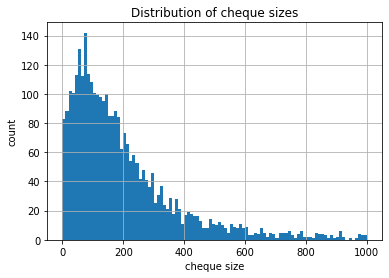

In [104]:
cheque_size_fin.query('cheque_size > 0')['cheque_size'].hist(range = (0,1000), bins = 100)
plt.xlabel("cheque size")
plt.ylabel("count")
plt.title("Distribution of cheque sizes")
plt.show()

In [105]:
cheque_size_fin.describe()

cheque_size
count   3490.000000
mean     286.985788
std     1458.348893
min        0.000000
25%       60.282500
50%      140.560000
75%      265.360000
max    77182.560000

Let's check the outliers:

In [106]:
c99 = cheque_size_fin.quantile(0.95)[0]

In [107]:
c99

774.1424999999992

95% of the purchases are below 775 money units; given the median price of the products on the price list (1.45) it will be reasonable to drop the upper 5%:

In [108]:
outlier_ids = cheque_size.query('cheque_size > 775')['purchase_id'].to_list()

In [109]:
len(outlier_ids)

175

In [110]:
purchases_fin = purchases_fin.query('purchase_id not in @outlier_ids')

In [111]:
cheque_size_fin = cheque_size_fin.query('purchase_id not in @outlier_ids')

In [112]:
cheque_size_fin.describe()

cheque_size
count  3315.000000
mean    170.682640
std     154.938155
min       0.000000
25%      57.050000
50%     131.830000
75%     238.780000
max     772.520000

In [113]:
purchases_fin[purchases_fin['loyalty_program']==1]['customer_id'].nunique() / purchases_fin['customer_id'].nunique()

0.33941605839416056

In [114]:
purchases_fin[purchases_fin['loyalty_program']==1]['purchase_id'].nunique() /purchases_fin['purchase_id'].nunique()

0.33815987933634994

We have dropped another 175 purchases, the proportions remain similar and closer and the distribution remains right skewed. N.B. We can filter out purchases with "luxury" items as mentioned above.

Finally, let's consider the distributions of the cheque sizes for the two groups:

In [115]:
group_0_purchase_ids = purchases_fin[purchases_fin['loyalty_program']==0]['purchase_id'].to_list()

In [116]:
group_1_purchase_ids = purchases_fin[purchases_fin['loyalty_program']==1]['purchase_id'].to_list()

In [117]:
cheque_size_fin['loyalty_program'] = np.where(cheque_size_fin['purchase_id'].isin(group_1_purchase_ids), "member", "non-member")

In [118]:
fig = px.histogram(cheque_size_fin, x="cheque_size", color="loyalty_program",
                   histnorm='probability density')
fig.update_layout(title_text="Distribution of cheque sizes for members and non-memebrs of the loyalty program")
fig.update_xaxes(title_text='cheque size')
fig.update_layout(legend_title_text='Loyalty program')
fig.show()

Visually, the two distributions look essentially the same, with a slightly higher share of zero-cheques in non-member subset; let's check the numbers:

In [119]:
cheque_size_fin[cheque_size_fin['loyalty_program']=='member'].describe().join(
        cheque_size_fin[cheque_size_fin['loyalty_program']!='member'].describe(),
        lsuffix = '_member', rsuffix = '_non_member')

cheque_size_member  cheque_size_non_member
count         1121.000000             2194.000000
mean           153.149599              179.640953
std            142.314771              160.298880
min              0.000000                0.000000
25%             52.150000               60.690000
50%            112.310000              141.115000
75%            219.210000              248.687500
max            748.230000              772.520000

For members, despite the slightly higher share of zero-cheques in non-member subset, we have an average cheque of 153 money units, compared to 180 for non-members, while the median cheque has even higher difference - 112 compared to 141; even the maximum cheque is higher with non-members.

Let's compare the sales to both groups.

[Back to Content](#content)

### Total sales to both groups

In [120]:
group_sales = cheque_size_fin.pivot_table(index = 'loyalty_program', values = 'cheque_size', aggfunc = 'sum')

In [121]:
group_sales

cheque_size
loyalty_program             
member             171680.70
non-member         394132.25

The total sales to non_members is significantly higher, while this group counts more customers, let's comare the average sales per customer as well:

In [122]:
group_count = purchases_fin.pivot_table(index = 'loyalty_program', values = 'customer_id', aggfunc = 'nunique')

In [123]:
group_count.rename(columns = {'customer_id': 'customer_count'}, inplace =True)

In [124]:
group_count = group_count.reset_index()

In [125]:
group_count['loyalty_program'] = np.where(group_count['loyalty_program']==1, 'member', 'non-member')

In [126]:
group_count.set_index('loyalty_program', inplace = True)

In [127]:
group_sales = group_sales.join(group_count)

In [128]:
group_sales['average'] = group_sales['cheque_size']/group_count['customer_count']

In [129]:
group_sales

cheque_size  customer_count     average
loyalty_program                                         
member             171680.70             558  307.671505
non-member         394132.25            1086  362.921041

Average sale per customer in the non-member group is 20% higher that in the member group.

[Back to Content](#content)

### EDA summary

1. The `purchases` dataset covered a period of three months between Dec 01, 2016 and Feb 28, 2017; naturally, there is a gap in the data between Dec 24, 2016 and Jan 3, 2017.
2. Before the cheque size study:
    - The two groups, the member and the non-member, turned to consist of different customers, meaning that every one was only in one status through out the period under investigation and did not performed transition from one of the groups to the second one.
    - All the purchases through the loyalty program were performed by 587 customers who made 1344 purchases out of 4146 purchases in total in the dataset.
    - For the subset of non-member purchases, we had data on 1162 customers who made 2802 purchases in total; thus, the share of the loyalty program members was appr. 33.6% and they are responsible for 32.4% of the purchases.
3. During the cheque size study:
    - We revealed cheques with positive, zero, and negative values of the size; the cheques with negative cheque values were marked with the letter `c` at the beginning og the `purchase_id`.
    - Further investigation showed that 310 items on the price list had zero prices from the very beginning, while 1849 items had non-zero price, but entered some purchases with zero quantities; 17 `item_id`'s were revealed that enterd the `purchases` with negatives quantities only. 
    - We learned that "positive cheques" contained only positive or zero `item_id_total`'s, negative cheques contained only negative or zero `item_id_total`'s, while all shops have cases of negative cheques;.
    - One of the possible hypotheses could be that the letter `C` stands for returns; however, we also revealed that with that assumption, customers would return items before purchasing them and to the shops different from those they ended up with regular ("positive") cheque size values.
    - Thus, we could not conclude univocally that those "C-purchases" "behave" like returns and dropped them until we receive additional information from the sales department.
4. After dropping the misterious `purchase_id`'s, we were left with 3490 purchases, performed by 1688 customers; the proportions of customers and purchases remained similar - 33.6% of them members of the loyalty program and their share in total purchases is 33.3%.
5. After getting back to the cheque size distribution, we found 175 outliers above 775 money units, while the median was at 140; those purchases were perfrmed by 44 customers; we filtered them out and ended up having 558 `customer_id`'s for the member group and 1086 `customer_id`'s for the non-member group with average cheque size higher by 20% for the non-member group and the same proportion of ~33.9% for the member headcount and purchase count. 

[Back to Content](#content)

### Cohort analysis <a id='cohort'></a>

Our initial plan for the cohort analysis included:

- The date of the first purchase;
- The date of joining the loyalty program;
- Number of buyers by cohort lifetime for members and non-members;
- Number of purchases per customer by cohort lifetime for members and non-members;
- Average purchase size by cohort lifetime for members and non-members;
- Initial cohort sizes and total revenue by cohort for members and non-members (to calculate the LTV);

From the previous analysis we already know that we are dealing with customers that belong to one of the two groups from the beginning, we do not know, and hence, do not need to analyse the date of joining the loyalty program.

We will start the cohort analysis with preparing a dataframe with aggregated purchase details:

In [130]:
purchases_fin.head()

purchase_id item_id  item_ qty       purchase_date  customer_id  \
0      538280   21873         11 2016-12-10 12:50:00        18427   
1      538862   22195          0 2016-12-14 14:11:00        22389   
2      538855   21239          7 2016-12-14 13:50:00        22182   
3      543543   22271          0 2017-02-09 15:33:00        23522   
4      543812   79321          0 2017-02-13 14:40:00        23151   

   loyalty_program  shop_id  item_unit_price  item_id_total  
0                0   Shop 3             0.42           4.62  
1                1   Shop 2             1.65           0.00  
2                1   Shop 3             0.72           5.04  
3                1  Shop 28             2.55           0.00  
4                1  Shop 28             0.00           0.00

In [131]:
purchases_agg = purchases_fin.pivot_table(
                        index = 'purchase_id',
                        values = 'purchase_date',
                        aggfunc = 'min'
)

In [132]:
purchases_cust = purchases_fin[['purchase_id', 'customer_id', 'shop_id']]

In [133]:
purchases_cust.drop_duplicates(inplace = True)

In [134]:
purchases_cust = purchases_cust.set_index('purchase_id')

In [135]:
purchases_agg = purchases_agg.join(purchases_cust)

In [136]:
cheque_size_fin = cheque_size_fin.set_index('purchase_id')

In [137]:
purchases_agg = purchases_agg.join(cheque_size_fin)

In [138]:
purchases_agg.head()

purchase_date  customer_id  shop_id  cheque_size  \
purchase_id                                                          
536365      2016-12-01 08:26:00        23529  Shop 27        62.80   
536366      2016-12-01 08:28:00        23529  Shop 10         0.00   
536367      2016-12-01 08:34:00        18726   Shop 2       169.93   
536368      2016-12-01 08:34:00        18726  Shop 12        48.45   
536369      2016-12-01 08:35:00        18726  Shop 22        10.90   

            loyalty_program  
purchase_id                  
536365               member  
536366               member  
536367           non-member  
536368           non-member  
536369           non-member

N.B. Here we see another strange issue, when the same `customer_id` appears at the same moment in several shops; we will relate to it as another artifact of an artificial dataset and ignore so far.

#### First purchase

Let's assign to each purchase **the date of the first purchase**:

In [139]:
first_purchase_date_by_users = purchases_agg.groupby('customer_id')['purchase_date'].min()

In [140]:
first_purchase_date_by_users.name = 'first_purchase_date'

We use `join()` method to join the `purchases_agg` dataframe with the Series `first_purchase_date_by_users` on the `customer_id` column:

In [141]:
purchases_agg = purchases_agg.join(first_purchase_date_by_users, on='customer_id')

In [142]:
purchases_agg.head()

purchase_date  customer_id  shop_id  cheque_size  \
purchase_id                                                          
536365      2016-12-01 08:26:00        23529  Shop 27        62.80   
536366      2016-12-01 08:28:00        23529  Shop 10         0.00   
536367      2016-12-01 08:34:00        18726   Shop 2       169.93   
536368      2016-12-01 08:34:00        18726  Shop 12        48.45   
536369      2016-12-01 08:35:00        18726  Shop 22        10.90   

            loyalty_program first_purchase_date  
purchase_id                                      
536365               member 2016-12-01 08:26:00  
536366               member 2016-12-01 08:26:00  
536367           non-member 2016-12-01 08:34:00  
536368           non-member 2016-12-01 08:34:00  
536369           non-member 2016-12-01 08:34:00

The next step will be singling out weeks from the columns `first_purchase_date` to form cohorts. Let's call the `astype()` method and convert the column values to the `'datetime64[W]'` type.

In [143]:
purchases_agg['first_purchase_week'] = purchases_agg['first_purchase_date'].astype('datetime64[W]')

In [144]:
purchases_agg['purchase_week'] = purchases_agg['purchase_date'].astype('datetime64[W]')

In [145]:
purchases_agg.head()

purchase_date  customer_id  shop_id  cheque_size  \
purchase_id                                                          
536365      2016-12-01 08:26:00        23529  Shop 27        62.80   
536366      2016-12-01 08:28:00        23529  Shop 10         0.00   
536367      2016-12-01 08:34:00        18726   Shop 2       169.93   
536368      2016-12-01 08:34:00        18726  Shop 12        48.45   
536369      2016-12-01 08:35:00        18726  Shop 22        10.90   

            loyalty_program first_purchase_date first_purchase_week  \
purchase_id                                                           
536365               member 2016-12-01 08:26:00          2016-12-01   
536366               member 2016-12-01 08:26:00          2016-12-01   
536367           non-member 2016-12-01 08:34:00          2016-12-01   
536368           non-member 2016-12-01 08:34:00          2016-12-01   
536369           non-member 2016-12-01 08:34:00          2016-12-01   

            purchase_week  
purchase_id                
536365         2016-12-01  
536366         2016-12-01  
536367         2016-12-01  
536368         2016-12-01  
536369         2016-12-01

Let's add user lifetime within the cohort for each row of the initial dataframe:

In [146]:
purchases_agg['cohort_lifetime'] = (purchases_agg['purchase_week'] - purchases_agg['first_purchase_week'])
purchases_agg['cohort_lifetime'] = purchases_agg['cohort_lifetime'] / np.timedelta64(1, 'W')
purchases_agg['cohort_lifetime'] = round(purchases_agg['cohort_lifetime']).astype('int')

Let's cast the week columns into string labels to simplify preparing the visualisation code later on.

In [147]:
purchases_agg['first_purchase_week'] = purchases_agg['first_purchase_week'].dt.strftime('%Y-%m-%d').astype('str')
purchases_agg['purchase_week'] = purchases_agg['purchase_week'].dt.strftime('%Y-%m-%d').astype('str')

Let's group the data by `first_purchase_month` and evaluate the number of unique users for each cohort:

In [148]:
def data_pivot(df, index = 'first_purchase_week', columns = 'purchase_week'):
    """
    The function takes a dataframe, an index ('first_purchase_week' by default)
    and a column to pivot on ('purchase_week' by default) and returns corresponding pivot table.
    """
    return df.pivot_table(
    index=index,
    columns=columns,
    values='customer_id',
    aggfunc='nunique',
    )

In [149]:
data_pivot(purchases_agg)

purchase_week        2016-12-01  2016-12-08  2016-12-15  2016-12-22  \
first_purchase_week                                                   
2016-12-01                417.0        83.0        74.0         9.0   
2016-12-08                  NaN       287.0        42.0         4.0   
2016-12-15                  NaN         NaN       156.0         4.0   
2016-12-22                  NaN         NaN         NaN        13.0   
2016-12-29                  NaN         NaN         NaN         NaN   
2017-01-05                  NaN         NaN         NaN         NaN   
2017-01-12                  NaN         NaN         NaN         NaN   
2017-01-19                  NaN         NaN         NaN         NaN   
2017-01-26                  NaN         NaN         NaN         NaN   
2017-02-02                  NaN         NaN         NaN         NaN   
2017-02-09                  NaN         NaN         NaN         NaN   
2017-02-16                  NaN         NaN         NaN         NaN   
2017-02-23                  NaN         NaN         NaN         NaN   

purchase_week        2016-12-29  2017-01-05  2017-01-12  2017-01-19  \
first_purchase_week                                                   
2016-12-01                 13.0        71.0        59.0        45.0   
2016-12-08                  5.0        34.0        28.0        35.0   
2016-12-15                  2.0        10.0        12.0        13.0   
2016-12-22                  NaN         NaN         1.0         NaN   
2016-12-29                 14.0         NaN         NaN         NaN   
2017-01-05                  NaN       116.0         4.0         7.0   
2017-01-12                  NaN         NaN        91.0         5.0   
2017-01-19                  NaN         NaN         NaN        97.0   
2017-01-26                  NaN         NaN         NaN         NaN   
2017-02-02                  NaN         NaN         NaN         NaN   
2017-02-09                  NaN         NaN         NaN         NaN   
2017-02-16                  NaN         NaN         NaN         NaN   
2017-02-23                  NaN         NaN         NaN         NaN   

purchase_week        2017-01-26  2017-02-02  2017-02-09  2017-02-16  \
first_purchase_week                                                   
2016-12-01                 56.0        50.0        56.0        50.0   
2016-12-08                 40.0        26.0        27.0        40.0   
2016-12-15                 19.0        15.0        12.0        12.0   
2016-12-22                  2.0         NaN         NaN         NaN   
2016-12-29                  NaN         2.0         NaN         2.0   
2017-01-05                  7.0        10.0         7.0         9.0   
2017-01-12                  9.0         6.0         4.0         7.0   
2017-01-19                  3.0         4.0         5.0         5.0   
2017-01-26                112.0         4.0         5.0         4.0   
2017-02-02                  NaN        89.0         5.0         3.0   
2017-02-09                  NaN         NaN        65.0         5.0   
2017-02-16                  NaN         NaN         NaN        91.0   
2017-02-23                  NaN         NaN         NaN         NaN   

purchase_week        2017-02-23  
first_purchase_week              
2016-12-01                 48.0  
2016-12-08                 15.0  
2016-12-15                 12.0  
2016-12-22                  1.0  
2016-12-29                  NaN  
2017-01-05                  8.0  
2017-01-12                 10.0  
2017-01-19                  5.0  
2017-01-26                  8.0  
2017-02-02                  5.0  
2017-02-09                  2.0  
2017-02-16                  4.0  
2017-02-23                 96.0

Let's visualize:

In [150]:
def cohort_viz(df, fmt = '.0f', title = 'Unique customers by cohort',
               xlabel = "Purchase week", ylabel = "First purchase week", vmin = None, vmax = None):
    """
    A function which takes a cohort pivot table df and visualizes it as a heatmap.
    For more flexibility, it can take a rounding parameter fmt, and a title string.
    """
    plt.figure(figsize=(18, 6))
    plt.title(title)
    sns.heatmap(
        data = df, cmap="YlGnBu",
        annot=True,
        fmt=fmt,
        linewidths=2,
        linecolor='lightgray',
        vmin = vmin,
        vmax = vmax
    )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

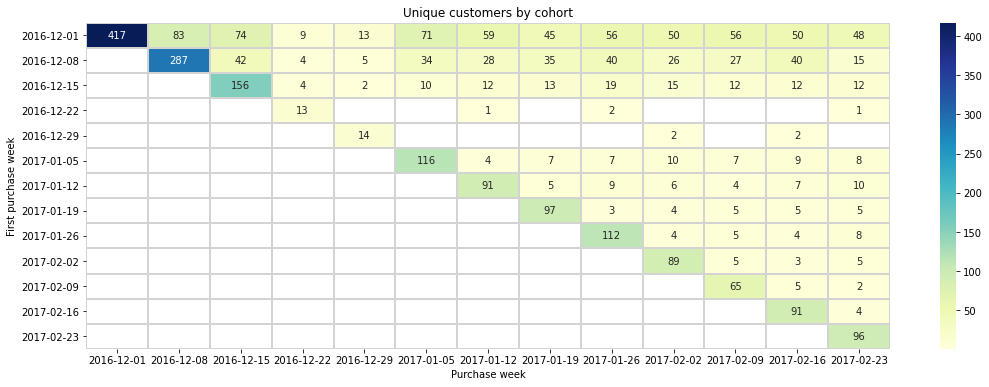

In [151]:
cohort_viz(data_pivot(purchases_agg))

The result shows that, in general, only for the cohort of the first week of December 2016 and the next cohort 10%-12% of the customers returned every week, for the rest of the cohorts the results were even worse.

Let's try to see whether there is any difference between the two groups of customers.

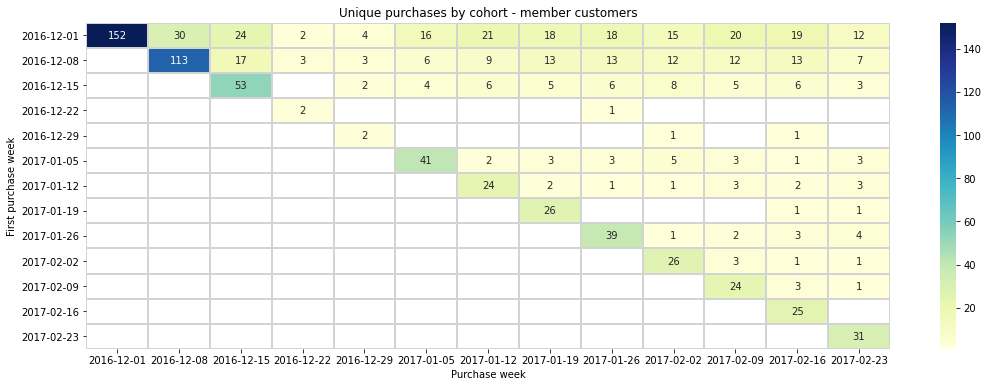

In [152]:
title = "Unique purchases by cohort - member customers"
cohort_viz(data_pivot(purchases_agg[purchases_agg['loyalty_program']=='member']), title = title)

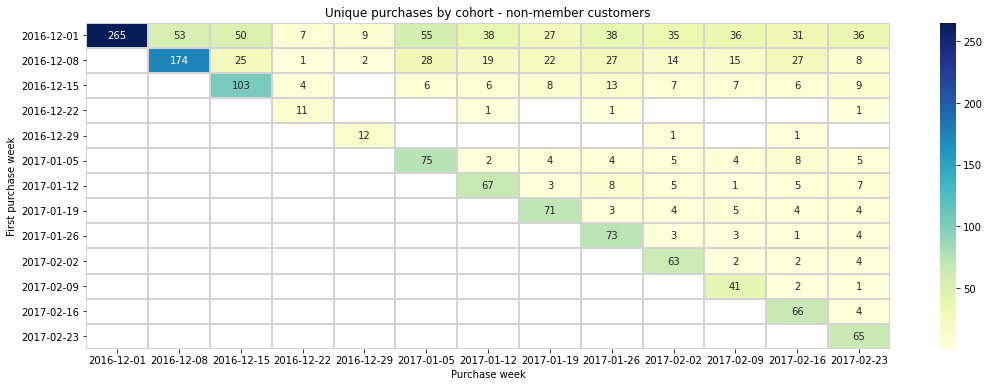

In [153]:
title = "Unique purchases by cohort - non-member customers"
cohort_viz(data_pivot(purchases_agg[purchases_agg['loyalty_program']=='non-member']), title = title)

Let's calculate the churn rates to get better understanding of the phenomenon. We will do this for the full dataset and in multiply the percentage change by 100 to make the visualization more friendly.

In [154]:
cohorts = purchases_agg.groupby(['first_purchase_week', 'purchase_week']).agg({'customer_id': 'nunique'}).reset_index()

In [155]:
cohorts_m = purchases_agg[purchases_agg['loyalty_program']=='member'].groupby(
                    ['first_purchase_week', 'purchase_week']).agg({'customer_id': 'nunique'}).reset_index()

In [156]:
cohorts_nm = purchases_agg[purchases_agg['loyalty_program']=='non-member'].groupby(
                    ['first_purchase_week', 'purchase_week']).agg({'customer_id': 'nunique'}).reset_index()

In [157]:
# Apply pct_change() to find the percentage change in a column compared with the value in the previous row 
cohorts['churn_rate'] = cohorts.groupby(['first_purchase_week'])['customer_id'].pct_change()*100 

In [158]:
cohorts_m['churn_rate'] = cohorts_m.groupby(['first_purchase_week'])['customer_id'].pct_change()*100 

In [159]:
cohorts_nm['churn_rate'] = cohorts_nm.groupby(['first_purchase_week'])['customer_id'].pct_change()*100 

In [160]:
churn_pivot = cohorts.pivot_table(
    index='first_purchase_week',
    columns='purchase_week',
    values='churn_rate',
    aggfunc='sum',
)


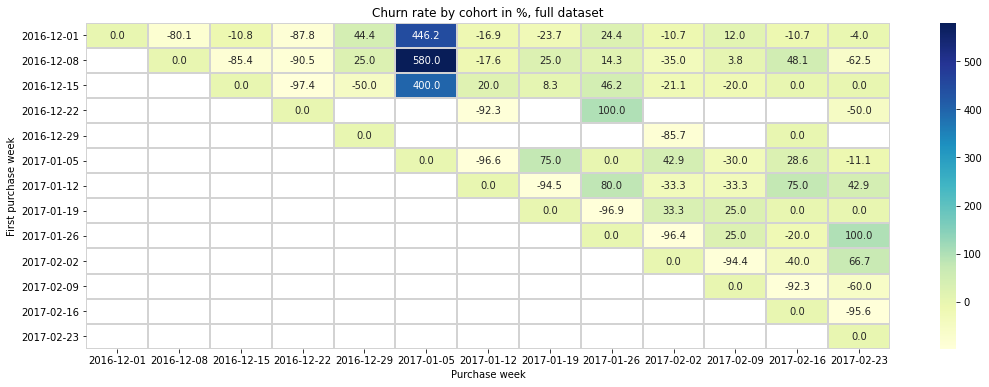

In [161]:
title = 'Churn rate by cohort in %, full dataset'
cohort_viz(churn_pivot, fmt = '.1f', title = title)

In [162]:
churn_pivot_m = cohorts_m.pivot_table(
    index='first_purchase_week',
    columns='purchase_week',
    values='churn_rate',
    aggfunc='sum',
)

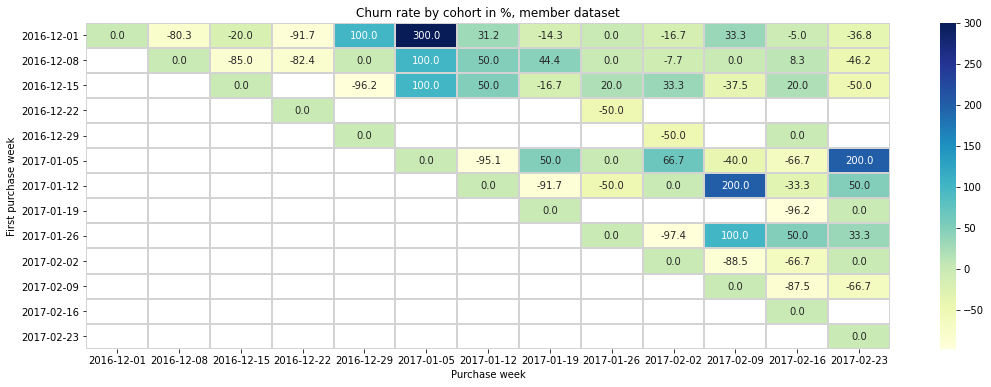

In [163]:
title = 'Churn rate by cohort in %, member dataset'
cohort_viz(churn_pivot_m, fmt = '.1f', title = title)

In [164]:
churn_pivot_nm = cohorts_nm.pivot_table(
    index='first_purchase_week',
    columns='purchase_week',
    values='churn_rate',
    aggfunc='sum',
)

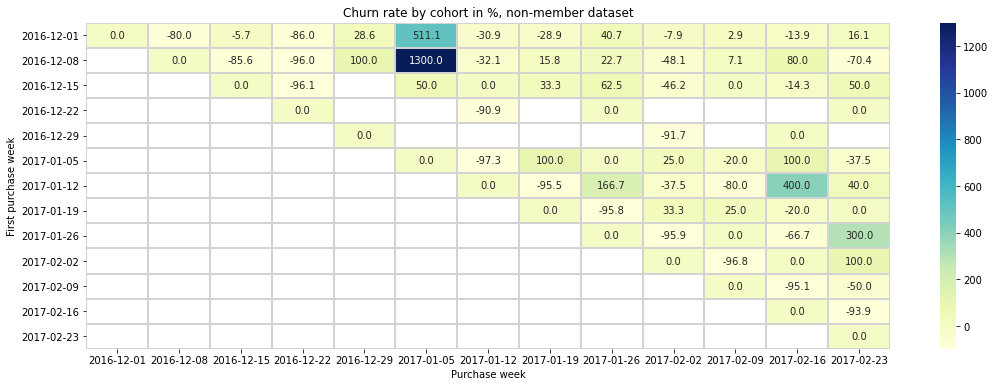

In [165]:
title = 'Churn rate by cohort in %, non-member dataset'
cohort_viz(churn_pivot_nm, fmt = '.1f', title = title)

We can conclude that the two groups exhibit similar behaviour with 80%-90% churning in the first two weeks; it looks like the reopening in the first week of January turned to be a kind of campaign, but it never helped; the first cohort was the most stable, while resulting in even better retention for non-members. Let's calculate retention rates, to better illustrate this conclusion.

#### Number of buyers by cohort lifetime

First, we will group the `purchases_agg` dataframe by cohorts and cohort lifetime and find **the initial number of customers in the cohort** by looking at the 0th week:

In [166]:
cohorts_lft = data_pivot(purchases_agg, columns = 'cohort_lifetime')

In [167]:
cohorts_lft_m = data_pivot(purchases_agg[purchases_agg['loyalty_program']=='member'], columns = 'cohort_lifetime')

In [168]:
cohorts_lft_nm = data_pivot(purchases_agg[purchases_agg['loyalty_program']=='non-member'], columns = 'cohort_lifetime')

In [169]:
initial_customers_count = cohorts_lft[0]
initial_customers_count.name = 'cohort_customers'

In [170]:
initial_customers_count_m = cohorts_lft_m[0]
initial_customers_count_m.name = 'cohort_customers_m'

In [171]:
initial_customers_count_nm = cohorts_lft_nm[0]
initial_customers_count_nm.name = 'cohort_customers_nm'

Let's check the initial cohort sizes:

In [172]:
initial_customers_count

first_purchase_week
2016-12-01    417.0
2016-12-08    287.0
2016-12-15    156.0
2016-12-22     13.0
2016-12-29     14.0
2017-01-05    116.0
2017-01-12     91.0
2017-01-19     97.0
2017-01-26    112.0
2017-02-02     89.0
2017-02-09     65.0
2017-02-16     91.0
2017-02-23     96.0
Name: cohort_customers, dtype: float64

Now we can calculate the retention rates:

In [173]:
coh_lft = pd.DataFrame()
coh_lft_m = pd.DataFrame()
coh_lft_nm = pd.DataFrame()
for col in list(range(0,12)):
    coh_lft[col] = cohorts_lft[col] *100 / initial_customers_count
    coh_lft_m[col] = cohorts_lft_m[col] *100 / initial_customers_count_m
    coh_lft_nm[col] = cohorts_lft_nm[col] *100 / initial_customers_count_nm

Finally, we visualize the retention rates by cohort lifetime.

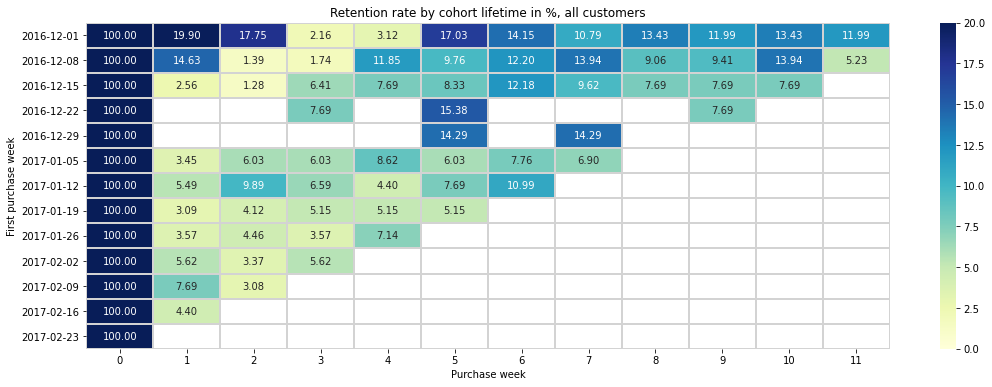

In [174]:
title = 'Retention rate by cohort lifetime in %, all customers'
vmin = 0
vmax = 20
cohort_viz(coh_lft, fmt = '.2f', title = title, vmin = vmin, vmax = vmax)

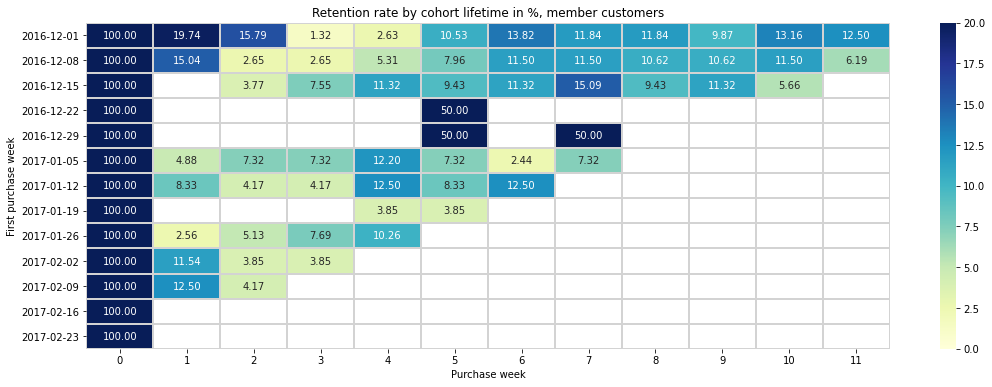

In [175]:
title = 'Retention rate by cohort lifetime in %, member customers'
vmin = 0
vmax = 20
cohort_viz(coh_lft_m, fmt = '.2f', title = title, vmin = vmin, vmax = vmax)

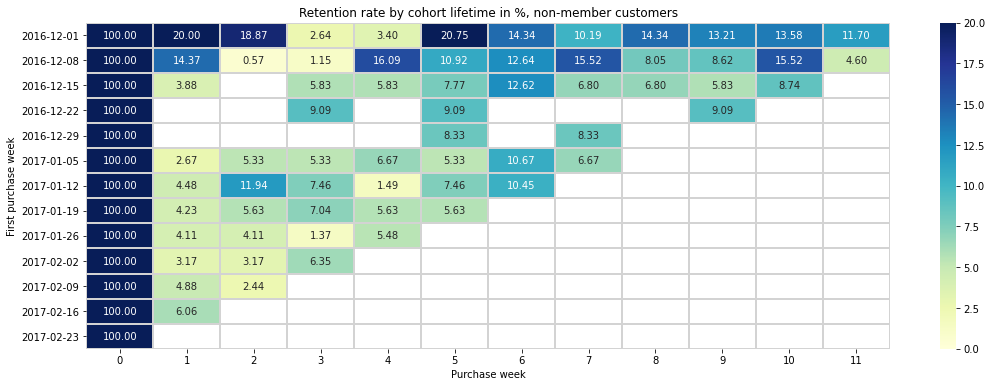

In [176]:
title = 'Retention rate by cohort lifetime in %, non-member customers'
vmin = 0
vmax = 20
cohort_viz(coh_lft_nm, fmt = '.2f', title = title, vmin = vmin, vmax = vmax)

Correct, the retention rate seems to be only slightly better in the non-member group for almost every week in the first cohort. All in all, the `initial_customer_count`'s show that it would be better to have a larger sample, especially for studying the loyalty program groups.

#### Number of purchases per customer by cohort lifetime

In [177]:
purchases_agg.head()

purchase_date  customer_id  shop_id  cheque_size  \
purchase_id                                                          
536365      2016-12-01 08:26:00        23529  Shop 27        62.80   
536366      2016-12-01 08:28:00        23529  Shop 10         0.00   
536367      2016-12-01 08:34:00        18726   Shop 2       169.93   
536368      2016-12-01 08:34:00        18726  Shop 12        48.45   
536369      2016-12-01 08:35:00        18726  Shop 22        10.90   

            loyalty_program first_purchase_date first_purchase_week  \
purchase_id                                                           
536365               member 2016-12-01 08:26:00          2016-12-01   
536366               member 2016-12-01 08:26:00          2016-12-01   
536367           non-member 2016-12-01 08:34:00          2016-12-01   
536368           non-member 2016-12-01 08:34:00          2016-12-01   
536369           non-member 2016-12-01 08:34:00          2016-12-01   

            purchase_week  cohort_lifetime  
purchase_id                                 
536365         2016-12-01                0  
536366         2016-12-01                0  
536367         2016-12-01                0  
536368         2016-12-01                0  
536369         2016-12-01                0

In [178]:
purchases_pivot = purchases_agg.pivot_table(
    index='first_purchase_week',
    columns='cohort_lifetime',
    values='customer_id',
    aggfunc='count',
)

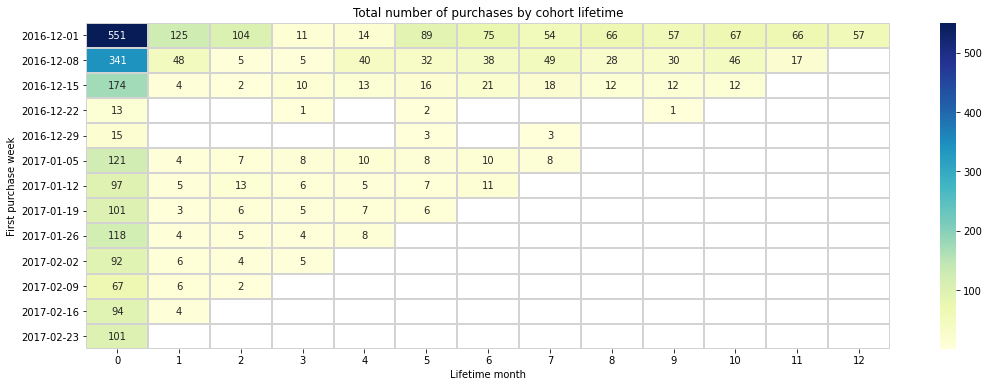

In [179]:
xlabel = "Lifetime month"
ylabel = "First purchase week"
title = "Total number of purchases by cohort lifetime"
cohort_viz(purchases_pivot, title = title, xlabel = xlabel, ylabel = ylabel)

In [180]:
purchases_pivot

cohort_lifetime         0      1      2     3     4     5     6     7     8   \
first_purchase_week                                                            
2016-12-01           551.0  125.0  104.0  11.0  14.0  89.0  75.0  54.0  66.0   
2016-12-08           341.0   48.0    5.0   5.0  40.0  32.0  38.0  49.0  28.0   
2016-12-15           174.0    4.0    2.0  10.0  13.0  16.0  21.0  18.0  12.0   
2016-12-22            13.0    NaN    NaN   1.0   NaN   2.0   NaN   NaN   NaN   
2016-12-29            15.0    NaN    NaN   NaN   NaN   3.0   NaN   3.0   NaN   
2017-01-05           121.0    4.0    7.0   8.0  10.0   8.0  10.0   8.0   NaN   
2017-01-12            97.0    5.0   13.0   6.0   5.0   7.0  11.0   NaN   NaN   
2017-01-19           101.0    3.0    6.0   5.0   7.0   6.0   NaN   NaN   NaN   
2017-01-26           118.0    4.0    5.0   4.0   8.0   NaN   NaN   NaN   NaN   
2017-02-02            92.0    6.0    4.0   5.0   NaN   NaN   NaN   NaN   NaN   
2017-02-09            67.0    6.0    2.0   NaN   NaN   NaN   NaN   NaN   NaN   
2017-02-16            94.0    4.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-02-23           101.0    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_lifetime        9     10    11    12  
first_purchase_week                          
2016-12-01           57.0  67.0  66.0  57.0  
2016-12-08           30.0  46.0  17.0   NaN  
2016-12-15           12.0  12.0   NaN   NaN  
2016-12-22            1.0   NaN   NaN   NaN  
2016-12-29            NaN   NaN   NaN   NaN  
2017-01-05            NaN   NaN   NaN   NaN  
2017-01-12            NaN   NaN   NaN   NaN  
2017-01-19            NaN   NaN   NaN   NaN  
2017-01-26            NaN   NaN   NaN   NaN  
2017-02-02            NaN   NaN   NaN   NaN  
2017-02-09            NaN   NaN   NaN   NaN  
2017-02-16            NaN   NaN   NaN   NaN  
2017-02-23            NaN   NaN   NaN   NaN

In [181]:
purchases_pivot_m = purchases_agg[purchases_agg['loyalty_program']=='member'].pivot_table(
    index='first_purchase_week',
    columns='cohort_lifetime',
    values='customer_id',
    aggfunc='count',
)

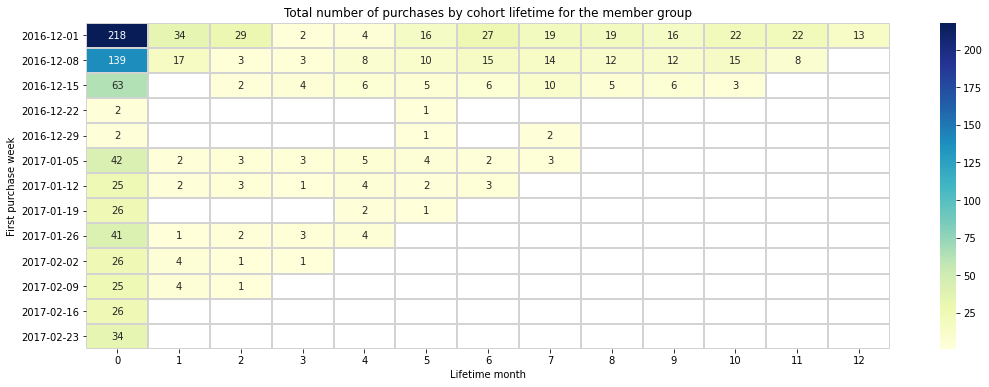

In [182]:
xlabel = "Lifetime month"
ylabel = "First purchase week"
title = "Total number of purchases by cohort lifetime for the member group"
cohort_viz(purchases_pivot_m, title = title, xlabel = xlabel, ylabel = ylabel)

In [183]:
purchases_pivot_nm = purchases_agg[purchases_agg['loyalty_program']=='non-member'].pivot_table(
    index='first_purchase_week',
    columns='cohort_lifetime',
    values='customer_id',
    aggfunc='count',
)

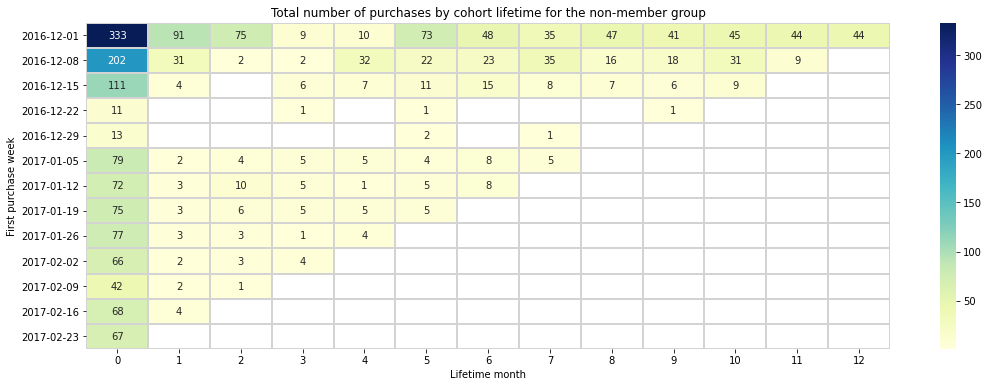

In [184]:
xlabel = "Lifetime month"
ylabel = "First purchase week"
title = "Total number of purchases by cohort lifetime for the non-member group"
cohort_viz(purchases_pivot_nm, title = title, xlabel = xlabel, ylabel = ylabel)

Again, the first cohort was the most active for the both groups and relative metric of purchases per customer is needed to derive any conclusions due to different sizes of the two subsets.

#### Average number of purchases by cohort lifetime

To calculate the average purchase size by cohort lifetime, we will combine the last tables with `cohorts_lft`' tables:

In [185]:
purchases_per_customer_pivot = pd.DataFrame(cohorts_lft.index)
purchases_per_customer_pivot = purchases_per_customer_pivot.set_index('first_purchase_week')
for col in cohorts_lft.columns.to_list():
    ser = pd.DataFrame(purchases_pivot[col] / cohorts_lft[col])
    purchases_per_customer_pivot = purchases_per_customer_pivot.join(ser)

Let's visualize the result:

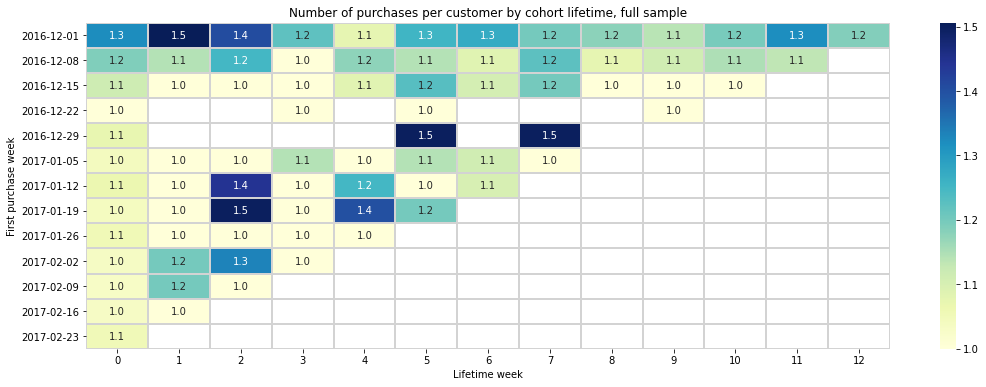

In [186]:
xlabel = "Lifetime week"
ylabel = "First purchase week"
title = "Number of purchases per customer by cohort lifetime, full sample"
cohort_viz(purchases_per_customer_pivot, fmt = '.1f', title = title, xlabel = xlabel, ylabel = ylabel)

In [187]:
purchases_per_customer_pivot_m = pd.DataFrame(cohorts_lft_m.index)
purchases_per_customer_pivot_m = purchases_per_customer_pivot_m.set_index('first_purchase_week')
for col in cohorts_lft_m.columns.to_list():
    ser = pd.DataFrame(purchases_pivot_m[col] / cohorts_lft_m[col])
    purchases_per_customer_pivot_m = purchases_per_customer_pivot_m.join(ser)

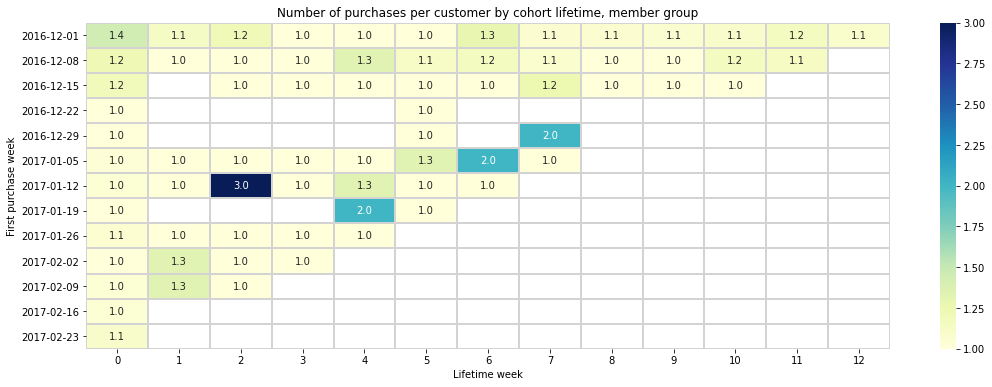

In [188]:
xlabel = "Lifetime week"
ylabel = "First purchase week"
title = "Number of purchases per customer by cohort lifetime, member group"
cohort_viz(purchases_per_customer_pivot_m, fmt = '.1f', title = title, xlabel = xlabel, ylabel = ylabel)

In [189]:
purchases_per_customer_pivot_nm = pd.DataFrame(cohorts_lft_nm.index)
purchases_per_customer_pivot_nm = purchases_per_customer_pivot_nm.set_index('first_purchase_week')
for col in cohorts_lft_nm.columns.to_list():
    ser = pd.DataFrame(purchases_pivot_nm[col] / cohorts_lft_nm[col])
    purchases_per_customer_pivot_nm = purchases_per_customer_pivot_nm.join(ser)

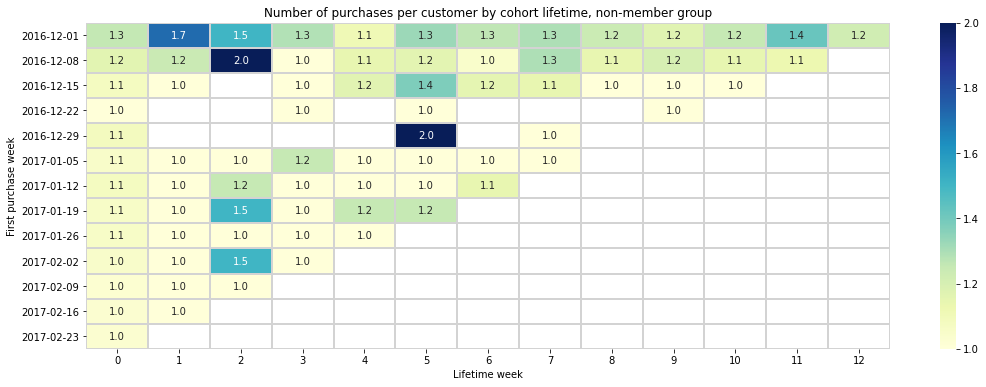

In [190]:
xlabel = "Lifetime week"
ylabel = "First purchase week"
title = "Number of purchases per customer by cohort lifetime, non-member group"
cohort_viz(purchases_per_customer_pivot_nm, fmt = '.1f', title = title, xlabel = xlabel, ylabel = ylabel)

In terms of average number of purchases per `customer_id`, the non-member group shows slightly better result; in general, the average number of purchases per `customer_id` takes values mosly between 1.0 and 2.0 in a week.

#### Average purchase size by cohort lifetime

In [191]:
revenue_pivot = purchases_agg.pivot_table(
    index='first_purchase_week',
    columns='cohort_lifetime',
    values='cheque_size',
    aggfunc='sum',
)

In [192]:
revenue_pivot_m = purchases_agg[purchases_agg['loyalty_program']=='member'].pivot_table(
    index='first_purchase_week',
    columns='cohort_lifetime',
    values='cheque_size',
    aggfunc='sum',
)

In [193]:
revenue_pivot_nm = purchases_agg[purchases_agg['loyalty_program']=='non-member'].pivot_table(
    index='first_purchase_week',
    columns='cohort_lifetime',
    values='cheque_size',
    aggfunc='sum',
)

Now we will combine the `purchases_pivot` and the `revenue_pivot` the same way as in the previous case, when we calculated the average number of orders per buyer.

In [194]:
purchase_size_pivot = pd.DataFrame(purchases_pivot.index)
purchase_size_pivot = purchase_size_pivot.set_index('first_purchase_week')
for col in purchases_pivot.columns.to_list():
    ser = pd.DataFrame(revenue_pivot[col] / purchases_pivot[col])
    purchase_size_pivot = purchase_size_pivot.join(ser)

Let's visualize the result:

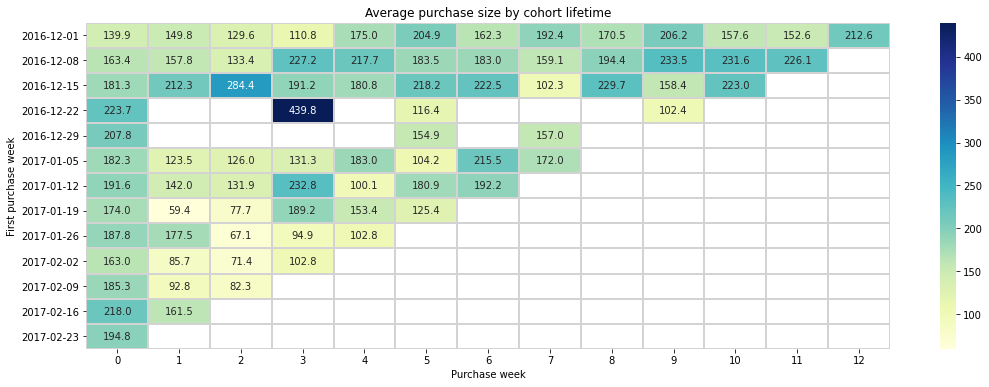

In [195]:
xlabel = "Purchase week"
ylabel = "First purchase week"
title = "Average purchase size by cohort lifetime"
cohort_viz(purchase_size_pivot, fmt = '.1f', title = title, xlabel = xlabel, ylabel = ylabel)

In [196]:
purchase_size_pivot_m = pd.DataFrame(purchases_pivot_m.index)
purchase_size_pivot_m = purchase_size_pivot_m.set_index('first_purchase_week')
for col in purchases_pivot_m.columns.to_list():
    ser = pd.DataFrame(revenue_pivot_m[col] / purchases_pivot_m[col])
    purchase_size_pivot_m = purchase_size_pivot_m.join(ser)

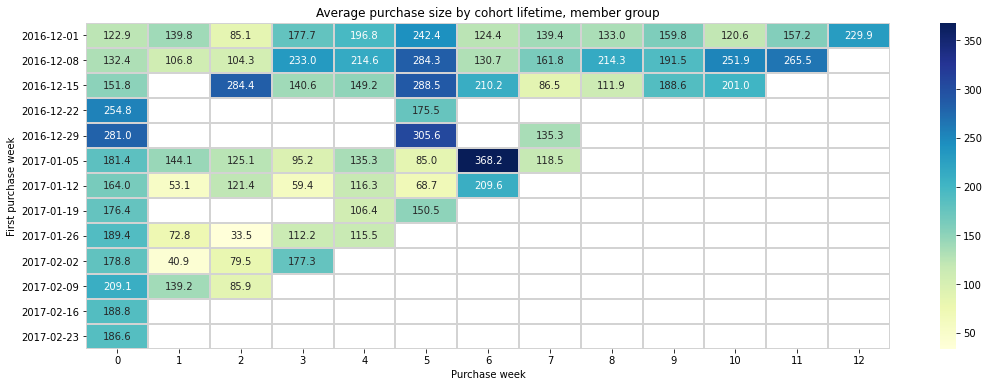

In [197]:
xlabel = "Purchase week"
ylabel = "First purchase week"
title = "Average purchase size by cohort lifetime, member group"
cohort_viz(purchase_size_pivot_m, fmt = '.1f', title = title, xlabel = xlabel, ylabel = ylabel)

In [198]:
purchase_size_pivot_nm = pd.DataFrame(purchases_pivot_nm.index)
purchase_size_pivot_nm = purchase_size_pivot_nm.set_index('first_purchase_week')
for col in purchases_pivot_nm.columns.to_list():
    ser = pd.DataFrame(revenue_pivot_nm[col] / purchases_pivot_nm[col])
    purchase_size_pivot_nm = purchase_size_pivot_nm.join(ser)

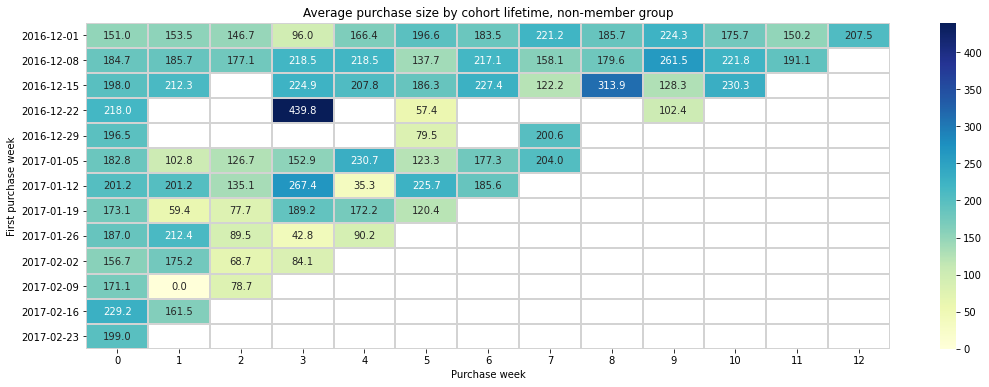

In [199]:
xlabel = "Purchase week"
ylabel = "First purchase week"
title = "Average purchase size by cohort lifetime, non-member group"
cohort_viz(purchase_size_pivot_nm, fmt = '.1f', title = title, xlabel = xlabel, ylabel = ylabel)

Average purchase size can be higher in either group; in general, the average purchase size is higher for the first week or second week for every cohort and for the first three cohorts; the return after the holidays in January 2017 resulted in much higher average purchase size in the member group, followed by a meaningful drop just afterwards.

Let's add the overall average purchase size across the whole dataset:

In [200]:
round(purchase_size_pivot.mean().mean(),1)

175.9

Let's add a mean revenue by month graph.

In [201]:
revenue_mean = purchases_agg.pivot_table(
    index='purchase_week',
    values='cheque_size',
    aggfunc='mean',
)

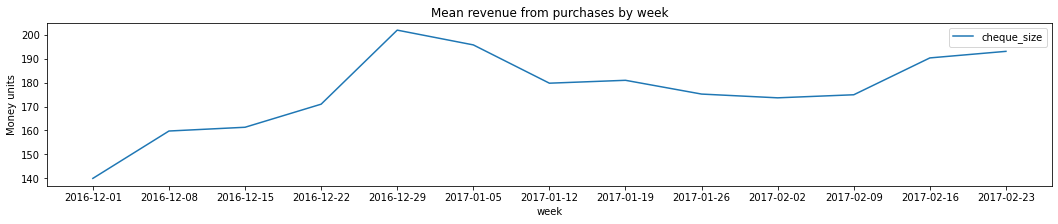

In [202]:
plt.figure(figsize=(18, 3))
sns.lineplot(data = revenue_mean)
plt.ymin = 0
plt.xlabel("week")
plt.ylabel("Money units")
plt.title(f"Mean revenue from purchases by week")
plt.show()

In [203]:
revenue_mean_m = purchases_agg[purchases_agg['loyalty_program']=='member'].pivot_table(
    index='purchase_week',
    values='cheque_size',
    aggfunc='mean',
)

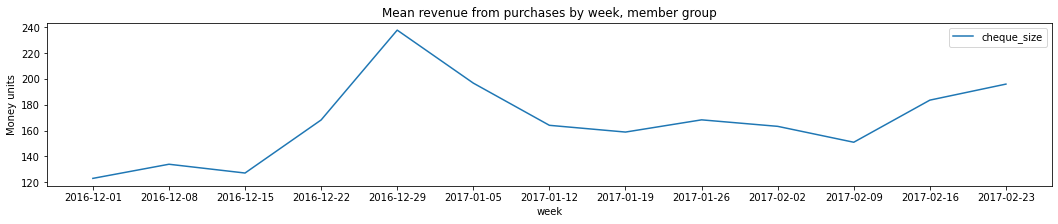

In [204]:
plt.figure(figsize=(18, 3))
sns.lineplot(data = revenue_mean_m)
plt.ymin = 0
plt.xlabel("week")
plt.ylabel("Money units")
plt.title(f"Mean revenue from purchases by week, member group")
plt.show()

In [205]:
revenue_mean_nm = purchases_agg[purchases_agg['loyalty_program']=='non-member'].pivot_table(
    index='purchase_week',
    values='cheque_size',
    aggfunc='mean',
)

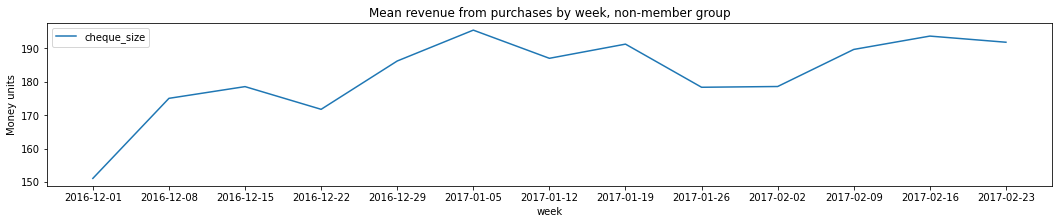

In [206]:
plt.figure(figsize=(18, 3))
sns.lineplot(data = revenue_mean_nm)
plt.ymin = 0
plt.xlabel("week")
plt.ylabel("Money units")
plt.title(f"Mean revenue from purchases by week, non-member group")
plt.show()

We can see a spike in the mean revenue by week for the member group for the week of the January reopening "campaign", while the mean revenue from the non-member group grows steadily; in the first weeks the mean revenue was even lower for the member group, than for the non-member group.

### Initial cohort sizes and total revenue by cohort (LTV)

Usually, LTV conveys the idea of accumulated average revenue from a customer with his lifetime; it is calculated on the basis of gross profit rather than revenue, but we have not been provided with the profitability rate to multiply the revenue by it.

We continue to work with the `purchases_agg` dataframe. Let's sum up the buyers' cohort sizes and total revenue by cohort:

In [207]:
cohort_sizes_m = purchases_agg[purchases_agg['loyalty_program']=='member'].groupby(
                ['first_purchase_week']).agg({'customer_id': 'nunique', 'cohort_lifetime': 'max'}).reset_index()
cohort_sizes_m.columns = ['first_purchase_week', 'n_buyers', 'cohort_lifetime']
cohort_sizes_m

first_purchase_week  n_buyers  cohort_lifetime
0           2016-12-01       152               12
1           2016-12-08       113               11
2           2016-12-15        53               10
3           2016-12-22         2                5
4           2016-12-29         2                7
5           2017-01-05        41                7
6           2017-01-12        24                6
7           2017-01-19        26                5
8           2017-01-26        39                4
9           2017-02-02        26                3
10          2017-02-09        24                2
11          2017-02-16        25                0
12          2017-02-23        31                0

In [208]:
cohort_revenue_m = revenue_pivot_m.sum(axis = 1)
cohort_revenue_m.name = 'total_cohort_revenue'

In [209]:
ltv_report_m = pd.merge(cohort_sizes_m, cohort_revenue_m, on='first_purchase_week')

In [210]:
ltv_report_m['ltv'] = ltv_report_m['total_cohort_revenue'] / ltv_report_m['n_buyers']

In [211]:
ltv_report_m

first_purchase_week  n_buyers  cohort_lifetime  total_cohort_revenue  \
0           2016-12-01       152               12              59228.55   
1           2016-12-08       113               11              40793.91   
2           2016-12-15        53               10              17453.48   
3           2016-12-22         2                5                684.98   
4           2016-12-29         2                7               1138.14   
5           2017-01-05        41                7              10678.49   
6           2017-01-12        24                6               5860.20   
7           2017-01-19        26                5               4949.00   
8           2017-01-26        39                4               8703.71   
9           2017-02-02        26                3               5068.67   
10          2017-02-09        24                2               5870.12   
11          2017-02-16        25                0               4907.58   
12          2017-02-23        31                0               6343.87   

           ltv  
0   389.661513  
1   361.008053  
2   329.310943  
3   342.490000  
4   569.070000  
5   260.450976  
6   244.175000  
7   190.346154  
8   223.172051  
9   194.948846  
10  244.588333  
11  196.303200  
12  204.640968

Let's illustrate this result. It's worth stressing that we are dealing with a metric estimate based on a 12 week sample; thus, be able to derive any meaningful conclusions and make the result actionable, we will add a trend line by running a simple regression model. First, let's see the data points:

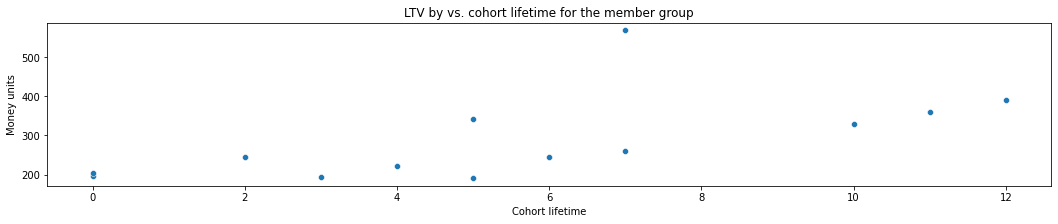

In [212]:
plt.figure(figsize=(18, 3))
sns.scatterplot(x = 'cohort_lifetime', y = 'ltv', data = ltv_report_m)
plt.xlabel("Cohort lifetime")
plt.ylabel("Money units")
plt.title(f"LTV by vs. cohort lifetime for the member group")
plt.show()

Let's add a regression line:

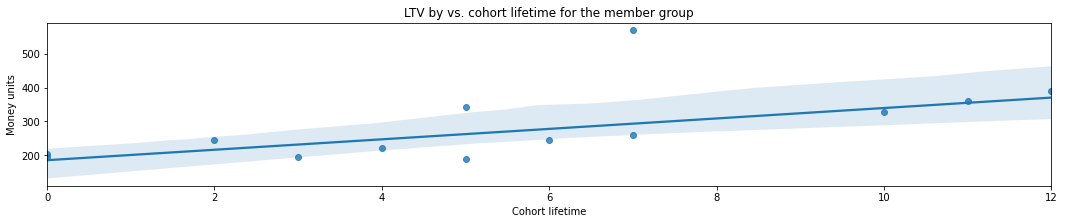

In [213]:
# NOTE: Sometimes the regression fails, run the cell several times
plt.figure(figsize=(18, 3))
sns.regplot(x = 'cohort_lifetime', y = 'ltv', data = ltv_report_m, robust = True)
plt.xlabel("Cohort lifetime")
plt.ylabel("Money units")
plt.title(f"LTV by vs. cohort lifetime for the member group")
plt.show()

The simple linear regression model suggests that, if nothing changes, for the member group,  one can expect the LTV to be sligthly higher than 300 money units by the end of three months. Let's construct a pivot table and illustrate it with a heatmap which will show the LTV in cumulative terms.

In [214]:
ltv_pivot_m = pd.DataFrame()
s = cohort_sizes_m[['first_purchase_week', 'n_buyers']].set_index('first_purchase_week')['n_buyers']
for col in revenue_pivot_m.columns.to_list():
    ltv_pivot_m[col] = revenue_pivot_m[col] / s

In [215]:
ltv_pivot_cumsum_m = ltv_pivot_m.cumsum(axis=1)

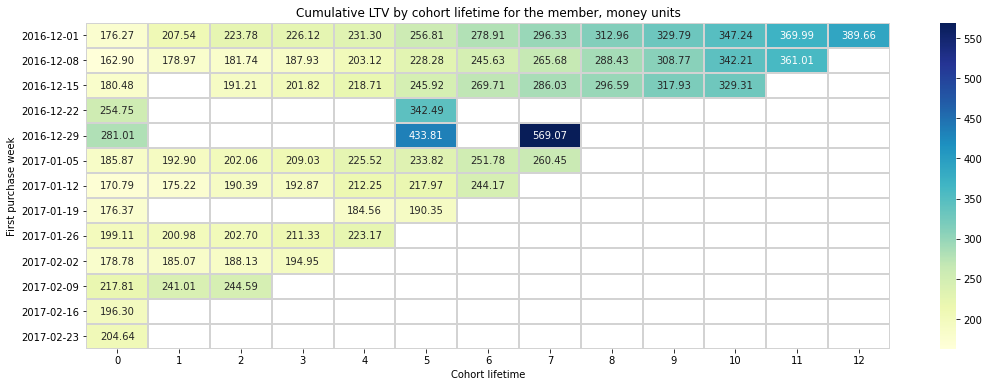

In [216]:
xlabel = "Cohort lifetime"
ylabel = "First purchase week"
title = "Cumulative LTV by cohort lifetime for the member, money units"
cohort_viz(ltv_pivot_cumsum_m, fmt = '.2f', title = title, xlabel = xlabel, ylabel = ylabel)

Let's conduct the same analysis for the non-member group;

In [217]:
cohort_sizes_nm = purchases_agg[purchases_agg['loyalty_program']!='member'].groupby(
                ['first_purchase_week']).agg({'customer_id': 'nunique', 'cohort_lifetime': 'max'}).reset_index()
cohort_sizes_nm.columns = ['first_purchase_week', 'n_buyers', 'cohort_lifetime']
cohort_revenue_nm = revenue_pivot_nm.sum(axis = 1)
cohort_revenue_nm.name = 'total_cohort_revenue'
ltv_report_nm = pd.merge(cohort_sizes_nm, cohort_revenue_nm, on='first_purchase_week')
ltv_report_nm['ltv'] = ltv_report_nm['total_cohort_revenue'] / ltv_report_nm['n_buyers']

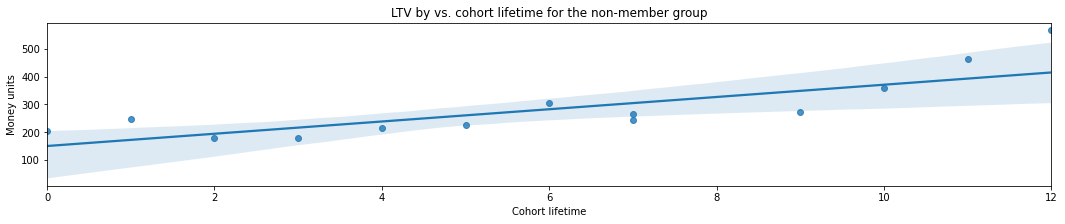

In [218]:
plt.figure(figsize=(18, 3))
sns.regplot(x = 'cohort_lifetime', y = 'ltv', data = ltv_report_nm, robust = True)
plt.xlabel("Cohort lifetime")
plt.ylabel("Money units")
plt.title(f"LTV by vs. cohort lifetime for the non-member group")
plt.show()

In [219]:
ltv_pivot_nm = pd.DataFrame()
s = cohort_sizes_nm[['first_purchase_week', 'n_buyers']].set_index('first_purchase_week')['n_buyers']
for col in revenue_pivot_nm.columns.to_list():
    ltv_pivot_nm[col] = revenue_pivot_nm[col] / s
ltv_pivot_cumsum_nm = ltv_pivot_nm.cumsum(axis=1)

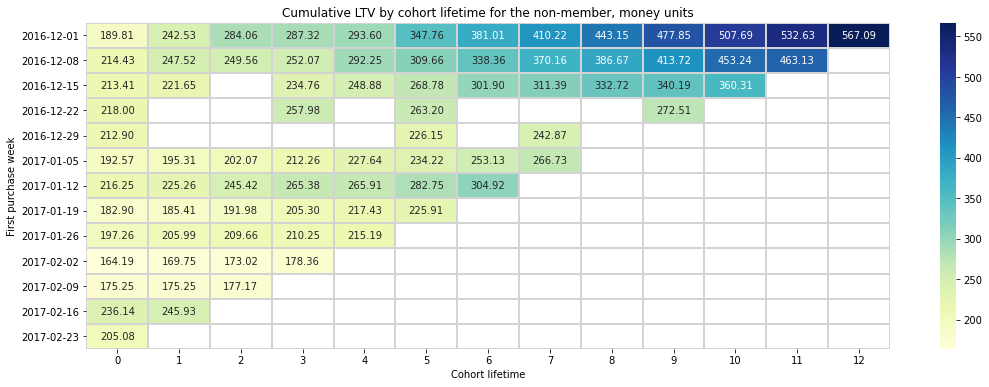

In [220]:
xlabel = "Cohort lifetime"
ylabel = "First purchase week"
title = "Cumulative LTV by cohort lifetime for the non-member, money units"
cohort_viz(ltv_pivot_cumsum_nm, fmt = '.2f', title = title, xlabel = xlabel, ylabel = ylabel)

Thus, for the non-member group, one can expect the LTV to be closer to 400 money units by the end of three months and the LTV of the non-member group seems to be higher than for the member group in general.

### Summary on the cohort analysis

1. The cohort counts study showed that, in general, only for the cohort of the first week of December 2016 and the next cohort 10%-12% of the customers returned every week, for the rest of the cohorts the results were worse.
2. The churning rate study revealed that the two groups exhibited similar behaviour with 80%-90% churning in the first two weeks; the return from holidays in the first week of January 2017 looked like a whole campaign, but it never helped; the first cohort was the most stable, while pointing at even better retention for non-members.
3. The retention rate analysis revealed that the retention rate was only slightly better in the non-member group for almost every week in the first cohort.
4. The first cohort was the most active for the both groups in terms of purchase counts.
5. In terms of average number of purchases per `customer_id`, the non-member group showed slightly better result; in general, the average number of purchases per `customer_id` values were between 1.0 and 2.0 in a week.
6. Average purchase size did not follow any particular pattern; in general, the average purchase size was higher for the first two weeks and for the first three cohorts; the reopening "campaign" in January 2017 resulted in much higher avergae purchase size in the member group, followed by a meaningful drop just afterwards.
7. In the first weeks the mean revenue was lower for the member group, than for the non-member group; there was a spike in the mean revenue by week for the member group at the week after the winter holidays, while the mean revenue from the non-member group grew steadily.
8. The analysis of the lifetime value metric showed that, for the member group, one could expect the LTV to be sligthly higher than 300 money units by the end of three months; for the non-member group, one could expect the LTV to be closer to 400 money units by the end of three months and the LTV of the non-member group seemed to be higher than for the member group in general.

[Back to Content](#content)

## Hypothesis testing <a id='sda'></a>

The plan for this part was formulated as follows:

- Choose the hypothesis for testing;
- Explain the set up and the test to be employed;
- Formulate the null and the alternative hypothesis;
- Implement testing;
- Elaborate on the results.

With regard to choosing the hypothesis for testing, our tentative list of hypotheses included:

- Customers start purchasing more frequently after joining the program;
- The average cheque is higher for program members;
- The retention rate is higher for the program members;
- There is difference in the LTV for the two group;
- There are stores for which the loyalty program works better than for the rest of the Home World network.

Given the analysis above, we can conclude that we do not have enough data to consider different stores or the change in the behaviour after joining the loyalty program, let's consider the rest of the hypotheses on the list.

### Testing the average cheque sizes

In what follows, we will first employ the Wilcoxon-Mann-Whitney Nonparametric Test to test the hypothesis of difference beetween distributions.

#### On testing the hypothesis of different ditributions with the Wilcoxon-Mann-Whitney Nonparametric Test

Nonparametric methods, in general, do not make assumptions about how the data is distributed, so one does not have to estimate the distribution's parameters (parametric methods use a sample to evaluate the parameters of the expected distribution, for example, the mean). These methods are used when hypotheses of normality are not relevant, like in our case of assymetrical cheque size distribution. N.B. Here, we omit applying the normality tests, since the graphical assessment of normality allows making unambiguous conclusion.

#### Applying the Wilcoxon-Mann-Whitney Nonparametric Test to testing the difference in the distributions of average cheque sizes

For applying the Wilcoxon-Mann-Whitney test we will prepare two samples, one for each group:

In [221]:
# reminder for the column names
purchases_agg.columns

Index(['purchase_date', 'customer_id', 'shop_id', 'cheque_size',
       'loyalty_program', 'first_purchase_date', 'first_purchase_week',
       'purchase_week', 'cohort_lifetime'],
      dtype='object')

In [222]:
avg_cheque_customer_m = pd.Series(purchases_agg[purchases_agg['loyalty_program']=='member'].pivot_table(
                        index = 'customer_id', values = 'cheque_size', aggfunc = 'mean'
                        )['cheque_size'], name = 'avg_cheque_m')

In [223]:
avg_cheque_customer_nm = pd.Series(purchases_agg[purchases_agg['loyalty_program']!='member'].pivot_table(
                        index = 'customer_id', values = 'cheque_size', aggfunc = 'mean'
                        )['cheque_size'], name = 'avg_cheque_nm')

Now, let's formulate the null and the alternative hypotheses for testing:
1. The null hypothesis: there is no difference in the distributions of average cheques between the two groups.
2. Alternative hypothesis: the distribution of average cheques are different.
3. p-value: 0.05. We will reject the null hypothesis if the p-value is higher.

We'll apply the criterion and format the p-value by rounding it to three decimal places. Let's start from the last one:

In [224]:
print("{0:.6f}".format(stats.mannwhitneyu(avg_cheque_customer_m, avg_cheque_customer_nm)[1]))

0.001044


The p-value is close to zero. So we can reject the null hypothesis that there is statistically insignificant difference in average cheques between the groups. Let's print the excess average cheque of the non-member group as compared with the member-group:

In [225]:
print("{0:.6f}".format(avg_cheque_customer_nm.mean()/avg_cheque_customer_m.mean()-1))

0.150174


Thus, the average cheque for the non-member group is 15% higher than for the member group: we can modify the test, to show that this is actually the case. To this end, we build a one-sided (unilateral) hypothesis: we have to pass another two parameters to the method: the boolean type and defines whether you should correct for the continuity of the distribution that's used to describe discrete data in the test and a string: `less`, `two-sided`, or `greater`. If the string parameter is employed, the boolean parameter needs to be True. Thus, for example, to compare the first dataset passed to the method results in greater metrics than the second one, we will set the parameter as `greater`:

In [226]:
print("{0:.6f}".format(stats.mannwhitneyu(avg_cheque_customer_nm, avg_cheque_customer_m, True, 'greater')[1]))

0.000522


The p-value is even smaller than in the case of two-sided test, thus we can reject the null hypothesis and conclude that the average cheque for the non-member group is higher than for the member group.

Now, actually, for the two samples under consideration, we have relatively high sample sizes, thus the t-test, or namely the Welch's modification to the t-test for different sample sizes and unequal variances, can be applied for testing of the equality of two population means. N.B. Both the t-test and the WMW test are ligitimate, though while being a non-parametric test, the WMW test can be considered as being the most useful for small studies; in addition, the two represent different perspectives: the t-test is a test for the hypothesis of equal means, whereas the WMW test is less specific - if the underlying distributions of the variable in the two groups differ only in location and not spread, like in means and medians, the WMW test is a test for the hypothesis of equal medians ([link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3445820/)).

Before running the t-test, we have to test our samples for equal variances by employing either [Bartlett’s test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm) or [the Levene test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm) for equal variances.

#### On testing for equal sample variance

The Bartlett test tests the null hypothesis that all input samples are from populations with equal variances for normal populations; the Python implementation of this test is [`scipy.stats.bartlett()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html#scipy.stats.bartlett) function. Levene’s test has better performance in cases with significant deviations from normality; The Python implementation of this test is [`scipy.stats.levene()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) function. In case of cheque size we already know that there is deviation from normality; nevertheless, let's compare the results for the two test:

#### Applying tests for equal sample variance

1. Null-hypothesis: member and non-member samples have equal variance for the cheque size distribution;
2. p-value: 5%;
3. The alternative hypothsis is that the two samples have different variance for the cheque size distribution. If the p-value is smaller than 5%, then we will have evidence against the null hypothesis of equal variance, so that we will have to define the `equal_var` attribute of the t-test as `False` and perform [Welch's variation of the t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test).

In [227]:
# Levene
stat, p = stats.levene(avg_cheque_customer_nm, avg_cheque_customer_m)
p

0.03064264096585002

In [228]:
# Bartlett (assumption of normally distributed samples)
stat, p = stats.bartlett(avg_cheque_customer_nm, avg_cheque_customer_m)
p

0.0011242989137886798

Both test result in the same conclusion: we can reject the null hypothesis. Let's apply the t-test:

The null and the alternative hypotheses for testing:
1. The null hypothesis: there is no difference in the mean cheque size values between the two groups.
2. Alternative hypothesis: the mean values of the `cheque_size` are different for the two groups.
3. p-value: 0.05. We will reject the null hypothesis if the p-value is higher.

In [229]:
print("{0:.6f}".format(stats.ttest_ind(avg_cheque_customer_nm,
                                          avg_cheque_customer_m, equal_var=False).pvalue))

0.000492


We have ended up with the same result, the average cheque sizes are different for the two groups (as shown above, the non-members spend more).

### Testing the retention rates

#### On testing the hypothesis of equal proportions

We will approach the retention rates testing as testing of proportions. To this end, we will employ the z-test of equal proportions: if one part of a statistical population has a certain feature while another part doesn't, we can make conclusions about the size of that proportion based on a sample taken from the population. As with the mean, for large enough samples sample proportions will be normally distributed around the actual one regardless of how the statistical population itself is distributed.

To compare the proportions of two populations based on samples from them, we calculate statistic - the difference between the proportions we observe in our samples, which should follow standard normal distribution:

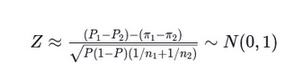

With retention testing, the null hypothesis is that `π₁ = π₂`,  where  `π₁` and `π₂` are the actual proportions of customers who continue to buy from Home World in the populations we are comparing; `P₁` and `P₂` are the proportions observed in the samples, and `P` is the proportion in the two samples combined; `n₁` and `n₂` represent the sizes of the two samples being compared.

#### Applying z-test to testing the hypothesis of equal retention rates

Let's build a "funnel" for proportions of customers who remained after four weeks (to preserve as many observationsas possible, since we will have to limit the samples and count across only those cohorts which had at least 4 weeks of the lifetime). To this end, we will employ `cohorts_lft`'s and particularly `initial_customers_count`'s:

In [230]:
cohorts_lft[:'2017-01-26']

cohort_lifetime         0     1     2     3     4     5     6     7     8   \
first_purchase_week                                                          
2016-12-01           417.0  83.0  74.0   9.0  13.0  71.0  59.0  45.0  56.0   
2016-12-08           287.0  42.0   4.0   5.0  34.0  28.0  35.0  40.0  26.0   
2016-12-15           156.0   4.0   2.0  10.0  12.0  13.0  19.0  15.0  12.0   
2016-12-22            13.0   NaN   NaN   1.0   NaN   2.0   NaN   NaN   NaN   
2016-12-29            14.0   NaN   NaN   NaN   NaN   2.0   NaN   2.0   NaN   
2017-01-05           116.0   4.0   7.0   7.0  10.0   7.0   9.0   8.0   NaN   
2017-01-12            91.0   5.0   9.0   6.0   4.0   7.0  10.0   NaN   NaN   
2017-01-19            97.0   3.0   4.0   5.0   5.0   5.0   NaN   NaN   NaN   
2017-01-26           112.0   4.0   5.0   4.0   8.0   NaN   NaN   NaN   NaN   

cohort_lifetime        9     10    11    12  
first_purchase_week                          
2016-12-01           50.0  56.0  50.0  48.0  
2016-12-08           27.0  40.0  15.0   NaN  
2016-12-15           12.0  12.0   NaN   NaN  
2016-12-22            1.0   NaN   NaN   NaN  
2016-12-29            NaN   NaN   NaN   NaN  
2017-01-05            NaN   NaN   NaN   NaN  
2017-01-12            NaN   NaN   NaN   NaN  
2017-01-19            NaN   NaN   NaN   NaN  
2017-01-26            NaN   NaN   NaN   NaN

In [231]:
pd.DataFrame(initial_customers_count).join(
        pd.DataFrame(initial_customers_count_m)).join(
            pd.DataFrame(initial_customers_count_nm))[:'2017-01-26']

cohort_customers  cohort_customers_m  cohort_customers_nm
first_purchase_week                                                           
2016-12-01                      417.0               152.0                265.0
2016-12-08                      287.0               113.0                174.0
2016-12-15                      156.0                53.0                103.0
2016-12-22                       13.0                 2.0                 11.0
2016-12-29                       14.0                 2.0                 12.0
2017-01-05                      116.0                41.0                 75.0
2017-01-12                       91.0                24.0                 67.0
2017-01-19                       97.0                26.0                 71.0
2017-01-26                      112.0                39.0                 73.0

Let's sum up the week 0 and week 4 counts for the relevant cohorts (we will keep the data on the joint sample as a reference):

In [232]:
week_0 = pd.DataFrame(initial_customers_count).join(
        pd.DataFrame(initial_customers_count_m)).join(
            pd.DataFrame(initial_customers_count_nm))[:'2017-01-26'].sum()

In [233]:
week_0 = pd.Series(week_0, name = 'week_0')

In [234]:
week_0

cohort_customers       1303.0
cohort_customers_m      452.0
cohort_customers_nm     851.0
Name: week_0, dtype: float64

In [235]:
week_4 = pd.DataFrame(cohorts_lft[:'2017-01-26'][4]).join(
        pd.DataFrame(cohorts_lft_m[:'2017-01-26'][4]), rsuffix = '_m').join(
            pd.DataFrame(cohorts_lft_nm[:'2017-01-26'][4]), rsuffix = '_nm')

In [236]:
week_4.columns = ['cohort_customers', 'cohort_customers_m', 'cohort_customers_nm']

In [237]:
week_4 = pd.Series(week_4.sum(), name = 'week_4')

In [238]:
week_4

cohort_customers       86.0
cohort_customers_m     29.0
cohort_customers_nm    57.0
Name: week_4, dtype: float64

In [239]:
funnel = pd.DataFrame(week_0).join(pd.DataFrame(week_4)).T

In [240]:
funnel

cohort_customers  cohort_customers_m  cohort_customers_nm
week_0            1303.0               452.0                851.0
week_4              86.0                29.0                 57.0

Now, let's formulate the hypothesis and implement the test:
1. The null hypothesis: the proportions of customers at week 4 are equal for the two groups, of members (`_m`) and non-members (`_nm`).
2. Alternative hypothesis: the proportions are different.
3. p-value: 0.05. We will reject the null hypothesis if the p-value is higher.

In [241]:
alpha = .05 # significance level

successes = np.array([funnel.loc['week_4'][1], funnel.loc['week_4'][2]])
trials = np.array([funnel.loc['week_0'][1], funnel.loc['week_0'][2]])

# success proportion in the first group:
p1 = successes[0]/trials[0]

# success proportion in the second group:
p2 = successes[1]/trials[1]

# success proportion in the combined dataset:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# the difference between the datasets' proportions
difference = p1 - p2

In [242]:
# calculating the statistic in standard deviations of the standard normal distribution
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# setting up the standard normal distribution (mean 0, standard deviation 1)
distr = stats.norm(0, 1) 

If the proportions were equal, the difference between them would be 0. Let's calculate how far from 0 our statistic turned out to be. What is the probability of getting such a difference or a greater one? Since the statistic's distribution is normal, we'll call the `cdf()` method. We'll get the absolute value of the statistic using the `abs()` method to ensure we get the right result no matter what sign the statistic has; for the same reason, we double the result.

In [243]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the proportions")
else:
    print("Failed to reject the null hypothesis: there is no reason to consider the proportions being different.")

p-value:  0.8452386236828786
Failed to reject the null hypothesis: there is no reason to consider the proportions being different.


Thus, we can conclude that for the first 4 weeks of the observations after a customer joins the customer base, there is no difference in the retention rate for members and non-members of the loyalty program.

### Testing the difference in LTV

To test for the difference in LTV, we will try and apply the Wilcoxon-Mann-Whitney Nonparametric Test to the samples of LTV for the cohort 1 customers: we will calculate the LTV at the `customer_id` level for the two groups and then apply the test.

In [244]:
ltv_customer_cohort_0_m = purchases_agg[(purchases_agg['loyalty_program']=='member')
                               & (purchases_agg['first_purchase_week']=="2016-12-01")].pivot_table(
                                            index = 'customer_id',
                                            values = 'cheque_size',
                                            aggfunc = 'sum'
                                            )

In [245]:
ltv_customer_cohort_0_nm = purchases_agg[(purchases_agg['loyalty_program']!='member')
                               & (purchases_agg['first_purchase_week']=="2016-12-01")].pivot_table(
                                            index = 'customer_id',
                                            values = 'cheque_size',
                                            aggfunc = 'sum'
                                            )

Now, let's formulate the null and the alternative hypotheses for testing:
1. The null hypothesis: there is no difference in the distributions of lifetime values between the two groups.
2. Alternative hypothesis: the distribution of lifetime values are different.
3. p-value: 0.05. We will reject the null hypothesis if the p-value is higher.

In [246]:
print("{0:.6f}".format(stats.mannwhitneyu(ltv_customer_cohort_0_nm['cheque_size'],
                                          ltv_customer_cohort_0_m['cheque_size'])[1]))

0.129354


The p-value is above 0.05. So we cannot reject the null hypothesis that there is statistically insignificant difference in LTV's between the groups. Let's print the excess LTV of the non-member group as compared with the member-group:

In [247]:
print("{0:.6f}".format(ltv_customer_cohort_0_nm['cheque_size'].mean()/ltv_customer_cohort_0_m['cheque_size'].mean()-1))

0.455342


Interestingly, the average LTV for the non-member customers seems to be 45% higher than for the member customers. Given, that we have found statistically significant difference in the average cheque between the groups, while the overall retention rate seems to be similar, we would expect revealing statistically significant difference in the LTV's as well. Let's preform the same calculation for the second cohort:

In [248]:
ltv_customer_cohort_1_m = purchases_agg[(purchases_agg['loyalty_program']=='member')
                               & (purchases_agg['first_purchase_week']=="2016-12-08")].pivot_table(
                                            index = 'customer_id',
                                            values = 'cheque_size',
                                            aggfunc = 'sum'
                                            )

In [249]:
ltv_customer_cohort_1_nm = purchases_agg[(purchases_agg['loyalty_program']!='member')
                               & (purchases_agg['first_purchase_week']=="2016-12-08")].pivot_table(
                                            index = 'customer_id',
                                            values = 'cheque_size',
                                            aggfunc = 'sum'
                                            )

In [250]:
print("{0:.6f}".format(stats.mannwhitneyu(ltv_customer_cohort_1_nm['cheque_size'],
                                          ltv_customer_cohort_1_m['cheque_size'])[1]))

0.027422


In [251]:
print("{0:.6f}".format(ltv_customer_cohort_1_nm['cheque_size'].mean()/ltv_customer_cohort_1_m['cheque_size'].mean()-1))

0.282867


OK, for the second cohort we actually see that statistically significant result we expected: the p-value is below 0.05; thus, we can reject the hypothesis of the similarity of the LTV distributions for the two groups, while the excess LTV for the non-member group shows to be 30% higher than for the member group.

Now, actually, even that we consider cohorts, for the two cohorts under consideration, we still have relatively high sample sizes; thus, similarly to testing the mean cheque size, the Welch's modification to the t-test for different sample sizes and unequal variances can be applied for testing of the equality of two population means.

Before running the t-test, we will check the samples for normality and employ either [Bartlett’s test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm) or [the Levene test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm) for equal variances.

#### Checking the asumption of LTV distribution normality

Let's continue and apply the analysis to the first two cohorts:

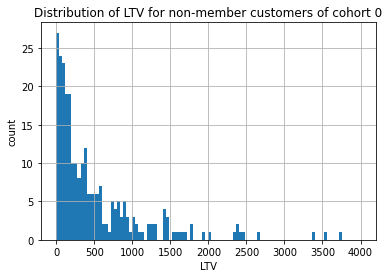

In [252]:
ltv_customer_cohort_0_nm['cheque_size'].hist(range = (0,4000), bins = 100)
plt.xlabel("LTV")
plt.ylabel("count")
plt.title("Distribution of LTV for non-member customers of cohort 0")
plt.show()

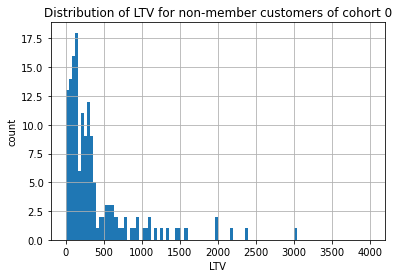

In [253]:
ltv_customer_cohort_0_m['cheque_size'].hist(range = (0,4000), bins = 100)
plt.xlabel("LTV")
plt.ylabel("count")
plt.title("Distribution of LTV for non-member customers of cohort 0")
plt.show()

Thus, the deviations from normality are even more pronounced for the LTV distributions and we will apply the Levene test for equal variances:

1. Null-hypothesis: member and non-member samples have equal variance for the TLV distribution;
2. p-value: 5%;
3. The alternative hypothsis is that the two samples have different variance for the TLV distribution. If the p-value is smaller than 5%, then we will have evidence against the null hypothesis of equal variance, so that we will have to define the `equal_var` attribute of the t-test as `False` and perform [Welch's variation of the t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test).

In [254]:
stat, p = stats.levene(ltv_customer_cohort_0_nm['cheque_size'], ltv_customer_cohort_0_m['cheque_size'])
p

0.011494201042846078

In [255]:
stat, p = stats.levene(ltv_customer_cohort_1_nm['cheque_size'], ltv_customer_cohort_1_m['cheque_size'])
p

0.16167892584896862

Here, again, we have different results for the first and for the second cohorts: for cohort 0 we reject the hypothesis of equal variances, while we cannot reject it for cohort 1. Let's perform the t-test correspondingly:

The null and the alternative hypotheses for testing:
1. The null hypothesis: there is no difference in the mean LTV values between the two groups.
2. Alternative hypothesis: the mean values of LTV are different for the two groups.
3. p-value: 0.05. We will reject the null hypothesis if the p-value is higher.

In [256]:
print("{0:.6f}".format(stats.ttest_ind(ltv_customer_cohort_0_nm['cheque_size'],
                                          ltv_customer_cohort_0_m['cheque_size'], equal_var=False).pvalue))

0.007362


In [257]:
print("{0:.6f}".format(stats.ttest_ind(ltv_customer_cohort_1_nm['cheque_size'],
                                          ltv_customer_cohort_1_m['cheque_size']).pvalue))

0.070948


As opposed to the WMW test, for cohort 0, we can reject the hypothesis of equal LTV for the member and non-member group, while we cannot reject it for cohort 1, at least at the 5% of confidence level. Nevertheless, the hypothesis can be rejected in both cases at 10% level of confidence.

### Hypotheses testing summary

1. We have performed testing of hypothese on three metrics:
    - The average cheque is higher for program members;
    - The retention rate is higher for the program members;
    - There is difference in the LTV for the two group.
2. For testing the average cheque size and LTV's, we applied both the Wilcoxon-Mann-Whitney non-parametric test and the Welch's modification of the t-test; testing for equal variances with the Levene test was performed before applying the t-test; for testing the retention rates, the z-test for equal shares was applied for the first 4 weeks of the observations after a customer joined the customer base.
3. The average cheque size was shown to be significantly higher for the non-member group than for the member group at the 5% level of confidence.
4. The retention rate after a 4-week period did not shoed any statistically significant difference for members and non-members of the loyalty program.
5. The results for the LTV were not straightforward, but we managed to show, for cohorts 0 (of the first week) and cohort 1 (of the second week), that the hypothesis of equal LTV's for the member and the non-member groups can be rejected with the t-test at 10% level of confidence.

[Back to Content](#content)

## Dashboard <a id='dashboard'></a>

Based on the analysis above, starting with the following dashboard could benefit the marketing department in their monitoring of loyalty programs dynamics:

1. A diagram showing the absolute number of purchases (unique `purchase_id`'s) per day, including an indicator of the number of active customers.
2. A diagram showing the share of the two groups in purchases per day.
3. A diagram showing the distribution of active customers by purchase week.
3. A diagram showing the total revenue by purchase week.

Applicable filters: store ID, loyalty program membership.

Comment 1: In Tableau we should filter out Null values for `purchase_id` (Tableau replaces "C-purchases" with Nulls, since the letter at the beginning turns them into strings) and `customer_id`.

Comment 2: The revenue diagram requires building relationship between the `retail_dataset` and the `product_codes` tables.

The [link](https://public.tableau.com/views/DA-FinalProjectScatch-v3/HomeWorldLoyaltytrends?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link) to the dashboard on Tableau Public.

[Back to Content](#content)

## Conclusions and recommendation <a id='conclusions'></a>

The current study revealed multiple questions with regard to the results of the loyalty program under consideration:

1. The [cohort analysis](#cohort) showed that:
    - Only for the cohort of the first week of December 2016 and the next cohort 10%-12% of the customers returned every week, for the rest of the cohorts the results were worse; the non-member group showed slightly better retention, higher average number of purchases per `customer_id`.
    - Besides one spike (after the return from the winter holidays), the mean revenue was lower for the member group, than for the non-member group.
    - LTV of the non-member group seemed to be higher than for the member group in general, while by the end of a three month period one could expect the LTV of 300+ money units and about 400 money units for the member and non-member group correspondingly.
    

2. The [hypotheses testing](#sda) supported the conclusions above:
    - The average cheque size was shown to be significantly higher for the non-member group than for the member.
    - The retention rate did not show any statistically significant difference for members and non-members.
    - The hypothesis of equal LTV's for the member and the non-member groups was rejected.

Thus, the only recommendation here can be conducting a deep review of the loyalty program terms with a major makeover following it.

[Back to Content](#content)